In [6]:
# OpenOE_AC_map_v1_01, 06/30/15
#__version__=1.02
#__version__=1.03 # removing the initial gap (acquired when Open Ephys is initialized)
__version__=1.04 # 07/03/15, adding saving the averaged file into an hdf5-file
__version__=1.05 # fixing the averaging, AAC
__version__=1.06 # fixed variable initial TTL-triggered datapoints removal, zeroing time
__version__ # CSD added CSD analysis
__version__=1.07 # file output is now into the report directory
__version__=1.08 # batch analysis, one figure summary output
__version__=1.0801 #troubleshooting misalignment during averaging, single channel from d2_array seems fine.
__version__=1.0802 # creating summaries for all three columns of the 64ch shank
__version__=1.09 # 07/27/15 Sorting order of file_list is fixed, CSD working properly. everything is working
__version__=1.0901 # 07/29/15 true CSD
__version__=1.12 # 03/15/16 - added spectrogram, frequency analysis
__version__=1.13 # 04/08/16 - use seaborn for formatting for publication (larger fonts, despined)
__version__=1.14 # 07/29/16 - trying to remove trials with mouse movement from the final averaged LFP using 1500 uV threshold



initial_gap=7168 # this is now recalculated later in the code, as this is variable from trial-to-trial

probe='64DA'

if probe=='64DA':
    
     # 64D probe mapping, channels face me
        probe_map={47:0.00, 63:1.00, 17:2.00,
               46:0.01, 0:1.01, 18:2.01,
               45:0.02, 62:1.02, 19:2.02,
               44:0.03, 1:1.03, 20:2.03,
               43:0.04, 61:1.04, 21:2.04,
               42:0.05, 2:1.05, 22:2.05,
               41:0.06, 60:1.06, 23:2.06,
               40:0.07, 3:1.07, 24:2.07,
               39:0.08, 59:1.08, 25:2.08,
               38:0.09, 4:1.09, 26:2.09,
               37:0.10, 58:1.10, 27:2.10,
               36:0.11, 5:1.11, 28:2.11,
               35:0.12, 57:1.12, 29:2.12,
               34:0.13, 6:1.13, 30:2.13,
               33:0.14, 56:1.14, 31:2.14,
               32:0.15, 7:1.15, 16:2.15,
               48:0.16, 55:1.16, 15:2.16,
               49:0.17, 8:1.17, 14:2.17,
               50:0.18, 54:1.18, 13:2.18,
               51:0.19, 9:1.19, 12:2.19,
               52:0.20, 53:1.20, 11:2.20,
                        10:1.21
               }     


elif probe == '64DB':
    # 64D probe mapping, channels face monitor
        probe_map={16:0.00, 0:1.00, 46:2.00,
               17:0.01, 63:1.01, 45:2.01,
               18:0.02, 1:1.02, 44:2.02,
               19:0.03, 62:1.03, 43:2.03,
               20:0.04, 2:1.04, 42:2.04,
               21:0.05, 61:1.05, 41:2.05,
               22:0.06, 3:1.06, 40:2.06,
               23:0.07, 60:1.07, 39:2.07,
               24:0.08, 4:1.08, 38:2.08,
               25:0.09, 59:1.09, 37:2.09,
               26:0.10, 5:1.10, 36:2.10,
               27:0.11, 58:1.11, 35:2.11,
               28:0.12, 6:1.12, 34:2.12,
               29:0.13, 57:1.13, 33:2.13,
               30:0.14, 7:1.14, 32:2.14,
               31:0.15, 56:1.15, 47:2.15,
               15:0.16, 8:1.16, 48:2.16,
               14:0.17, 55:1.17, 49:2.17,
               13:0.18, 9:1.18, 50:2.18,
               12:0.19, 54:1.19, 51:2.19,
               11:0.20, 10:1.20, 52:2.20,
                        53:1.21
               }
        


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype']=42
%matplotlib inline
mpl.rcParams['pdf.fonttype'] = 42 
mpl.rcParams['font.sans-serif']=['Arial', 'Helvetica','Bitstream Vera Sans', 'DejaVu Sans', 'Lucida Grande', 
                                 'Verdana', 'Geneva', 'Lucid', 'Avant Garde', 'sans-serif']  


# pal=sns.blend_palette(["black", "crimson"], 2)
sns.despine()
# current_palette = sns.color_palette("colorblind", 10)
# sns.set_palette(current_palette)

# for publication quality plots, not bar graphs, use this: 
def set_pub_plots(pal=sns.blend_palette(["gray","crimson", 'cyan', 'magenta', 'purple' ],5)):
    sns.set_style("white")
    sns.set_palette(pal)
    sns.set_context("poster", font_scale=1.5, rc={"lines.linewidth": 2.5, "axes.linewidth":2.5}) 
    sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    # optional, makes markers bigger, too, axes.linewidth doesn't seem to work
    plt.rcParams['axes.linewidth'] = 2.5

rc_pub={'font.size': 25, 'axes.labelsize': 25, 'legend.fontsize': 25.0, 
    'axes.titlesize': 25, 'xtick.labelsize': 25, 'ytick.labelsize': 25, 
    #'axes.color_cycle':pal, # image.cmap - rewritesd the default colormap
    'axes.linewidth':2.5, 'lines.linewidth': 2.5,
    'xtick.color': 'black', 'ytick.color': 'black', 'axes.edgecolor': 'black','axes.labelcolor':'black','text.color':'black'}
# to restore the defaults, call plt.rcdefaults() 

#set_pub_bargraphs()
set_pub_plots()

%load_ext autoreload
%autoreload 2

import scipy.signal as sg
sns.set_context("poster")
sns.set_style("ticks")
from collections import Counter
import Python3_OpenEphys_V14 as OE
import pandas as pd
from pandas import DataFrame
import numpy as np
import glob
import os
import re
import sys
import fnmatch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Figure size 640x480 with 0 Axes>

In [8]:
# import seaborn as sns
# import Python3_OpenOE_AC_map_functions_v1_08_30s as oem
# %matplotlib inline
import scipy
sns.set_context('poster')

load data

In [33]:
path=r'u:\Data\tang232\V1+LM\aligneddataall\BPnoise'
ls=[os.path.join(path, fd) for fd in os.listdir(path) if '.txt' not in fd]
ls1=[os.path.join(p,fd) for p in ls for fd in os.listdir(p) if '.txt' not in fd and '.npy' not in fd and '.png' not in fd]
files=[os.path.join(p,f) for p in ls1 for f in os.listdir(p)]
match = [f for f in files if '.npy' in f 
                             and 'broke' not in f 
                             and '.txt' not in f
                             #and not any(et in f for et in et_to_exclude)
        ]
match[:5]

['u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\post\\AL\\_01.24.2022_CC#084394_ET#073_right_post_6_0.03_002 BPnoise 10t_2022-01-24_12-58-50_100_0.npy',
 'u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\post\\AL\\_01.24.2022_CC#084394_ET#073_right_post_6_0.03_002 BPnoise 10t_2022-01-24_12-58-50_100_1.npy',
 'u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\post\\AL\\_01.24.2022_CC#084394_ET#073_right_post_6_0.03_002 BPnoise 10t_2022-01-24_12-58-50_100_2.npy',
 'u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\post\\AL\\_01.24.2022_CC#084394_ET#073_right_post_6_0.03_003 BPnoise 10t_2022-01-24_13-26-28_100_0.npy',
 'u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\post\\AL\\_01.24.2022_CC#084394_ET#073_right_post_6_0.03_003 BPnoise 10t_2022-01-24_13-26-28_100_1.npy']

In [12]:
note=r'u:\Data\tang232\V1+LM\aligneddataall\BPnoise\et_to_exclude.txt'
text_file = open(note, "r")
# lines = text_file.readlines()
lines = text_file.read().split('\n')
et_to_exclude=[et for et in lines if 'ET#' in et]
text_file.close()
print (et_to_exclude)
match=[f for f in match if not any(et in f for et in et_to_exclude)]
for f in sorted(match[:10]):
    print (f.split('\\')[-1])


['ET#010_right_pre', 'ET#012_right_post', 'ET#013_right_post', 'ET#014_right_post', 'ET#015_right_post']
_01.24.2022_CC#084394_ET#073_right_post_6_0.03_002 BPnoise 10t_2022-01-24_12-58-50_100_0.npy
_01.24.2022_CC#084394_ET#073_right_post_6_0.03_002 BPnoise 10t_2022-01-24_12-58-50_100_1.npy
_01.24.2022_CC#084394_ET#073_right_post_6_0.03_002 BPnoise 10t_2022-01-24_12-58-50_100_2.npy
_01.24.2022_CC#084394_ET#073_right_post_6_0.03_003 BPnoise 10t_2022-01-24_13-26-28_100_0.npy
_01.24.2022_CC#084394_ET#073_right_post_6_0.03_003 BPnoise 10t_2022-01-24_13-26-28_100_1.npy
_01.24.2022_CC#084394_ET#073_right_post_6_0.03_003 BPnoise 10t_2022-01-24_13-26-28_100_2.npy
_01.24.2022_CC#084394_ET#074_right_post_6_0.03_003 BPnoise 10t_2022-01-25_13-21-15_100_0.npy
_01.24.2022_CC#084394_ET#074_right_post_6_0.03_003 BPnoise 10t_2022-01-25_13-21-15_100_1.npy
_01.24.2022_CC#084394_ET#074_right_post_6_0.03_003 BPnoise 10t_2022-01-25_13-21-15_100_2.npy
_01.24.2022_CC#084394_ET#074_right_post_6_0.03_004 BPnoise

In [15]:
## stim info, for ET#009 and ET#010
import os
movpath=r'u:\Visual Stimulation\Yu Visual Stim\BPnoise\0.2duration'
mov_names=[m for m in os.listdir(movpath) if 'mp4' in m]
print(sorted(mov_names))
order = [ 2,  7, 17, 18, 21,  6,  3,  1, 22, 14, 13, 12,  8,  0, 16, 23,  5,
15, 24, 20, 10, 19,  9, 11,  4]

['0.015_0.75_pinknoise.mp4', '0.015_1.5_pinknoise.mp4', '0.015_12_pinknoise.mp4', '0.015_3_pinknoise.mp4', '0.015_6_pinknoise.mp4', '0.03_0.75_pinknoise.mp4', '0.03_1.5_pinknoise.mp4', '0.03_12_pinknoise.mp4', '0.03_3_pinknoise.mp4', '0.03_6_pinknoise.mp4', '0.06_0.75_pinknoise.mp4', '0.06_1.5_pinknoise.mp4', '0.06_12_pinknoise.mp4', '0.06_3_pinknoise.mp4', '0.06_6_pinknoise.mp4', '0.12_0.75_pinknoise.mp4', '0.12_1.5_pinknoise.mp4', '0.12_12_pinknoise.mp4', '0.12_3_pinknoise.mp4', '0.12_6_pinknoise.mp4', '0.24_0.75_pinknoise.mp4', '0.24_1.5_pinknoise.mp4', '0.24_12_pinknoise.mp4', '0.24_3_pinknoise.mp4', '0.24_6_pinknoise.mp4']


In [16]:
ets=set([str('_'.join(p.split('\\')[-1].split('_')[3:5])) for p in match])
dur200 = [et for et in ets if int(et.split('_')[0][-2:])>=12]
dur200[:5]

['ET#017_right', 'ET#019_left', 'ET#074_right', 'ET#060_left', 'ET#072_left']

In [34]:
matchc=[]
for pp in set([i.split('\\')[-3] for i in match]):
    subf = [f for f in match if pp in f]
#     for et in set([i.split('\\')[-1].split('_')[3] for i in subf]):
    for et in set(dur200):
        subf1 = [f for f in subf if et in f]
        for rg in set([i.split('\\')[-2] for i in subf1]):
            subf2 = [f for f in subf1 if rg in f.split('\\')[-2]]
            for exprt in set([' '.join(i.split('\\')[-1].split('_')[6].split(' ')[1:]) for i in subf2]):
                subf3 = [f for f in subf2 if exprt in f]
                for sk in set([i.split('\\')[-1].split('_')[-1] for i in subf3]):
                    
                    subf4 = [f for f in subf3 if sk in f]
                    matchc.append(subf4)
matchc

[['u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\pre\\LM\\_01.14.2020_CC#067414_ET#017_right_pre_001 BPnoise 10t_2020-01-16_11-37-36_100_0.npy',
  'u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\pre\\LM\\_01.14.2020_CC#067414_ET#017_right_pre_002 BPnoise 10t_2020-01-16_12-04-16_100_0.npy'],
 ['u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\pre\\LM\\_01.14.2020_CC#067414_ET#017_right_pre_001 BPnoise 10t_2020-01-16_11-37-36_100_2.npy',
  'u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\pre\\LM\\_01.14.2020_CC#067414_ET#017_right_pre_002 BPnoise 10t_2020-01-16_12-04-16_100_2.npy'],
 ['u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\pre\\LM\\_01.14.2020_CC#067414_ET#017_right_pre_001 BPnoise 10t_2020-01-16_11-37-36_100_1.npy',
  'u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\pre\\LM\\_01.14.2020_CC#067414_ET#017_right_pre_002 BPnoise 10t_2020-01-16_12-04-16_100_1.npy'],
 ['u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\pre\\V1\\_01.14.2020_CC#067414_ET#017_right

In [35]:
onestimmactchs=glob.glob(path+'\*\*\onestim\*.npy')
# onestimmactchs[:5]
onestimmactchc=[]
dictionary={}
for x in onestimmactchs:  
    key = '_'.join(x.split('_')[:-5]) # The key is the first 16 characters of the file name
    group = dictionary.get(key,[])
    group.append(x)
    dictionary[key] = group
#     onestimmactchc.append(group)
for k in dictionary.keys():
    for shk in set([g.split('_')[-1] for g in dictionary[k]]):
        tmp=[x for x in dictionary[k] if x.endswith(shk)]
        onestimmactchc.append(tmp)
onestimmactchc

[['u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\post\\AL\\onestim\\_01.24.2022_CC#084394_ET#073_right_post_6_0.03_001 BPnoise trained 20t_2022-01-24_12-54-58_100_0.npy'],
 ['u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\post\\AL\\onestim\\_01.24.2022_CC#084394_ET#073_right_post_6_0.03_001 BPnoise trained 20t_2022-01-24_12-54-58_100_2.npy'],
 ['u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\post\\AL\\onestim\\_01.24.2022_CC#084394_ET#073_right_post_6_0.03_001 BPnoise trained 20t_2022-01-24_12-54-58_100_1.npy'],
 ['u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\post\\AL\\onestim\\_01.24.2022_CC#084394_ET#074_right_post_6_0.03_002 BPnoise trained 20t_2022-01-25_13-18-35_100_0.npy'],
 ['u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\post\\AL\\onestim\\_01.24.2022_CC#084394_ET#074_right_post_6_0.03_002 BPnoise trained 20t_2022-01-25_13-18-35_100_2.npy'],
 ['u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\post\\AL\\onestim\\_01.24.2022_CC#084394_ET#074_right_post_6_

In [36]:
order10= [ 8,  1,  8,  3,  4,  3, 20, 21, 11,  7,  8, 20, 24,  3, 19, 24, 23,
        0,  2, 11, 24, 16, 13, 20, 22, 10, 10, 22,  9,  2, 22, 22,  8, 24,
        2,  7, 14, 22, 23,  0,  1, 18, 12, 11, 23, 16, 13, 16, 12,  0, 14,
       11,  1, 16,  8, 15,  7, 12, 20,  5, 12,  7, 17, 23, 10,  4,  7, 17,
        1,  3, 23,  6, 16,  5,  0, 14,  1, 19, 17, 19,  5,  1,  2, 14,  5,
       24, 17, 19,  6, 14,  2,  8, 19,  6, 13, 14, 18,  9,  6, 17, 20,  7,
        6,  6,  9, 17, 22,  5,  9, 11,  8,  4,  3, 14,  0, 22, 11, 10,  0,
       23, 21, 12,  7, 17,  7,  6, 12, 19,  6, 21, 12,  1,  7, 12, 15, 23,
       19, 11, 19, 11,  3, 18, 10, 17, 15, 10, 13,  5, 18, 13, 13, 15, 20,
       21, 18, 20,  4,  9,  1, 10,  5, 19, 15,  2, 22, 22, 12, 21, 10,  4,
       16,  0,  5, 13, 12, 13, 18,  4,  0,  6,  1,  9,  2, 21, 16, 17, 14,
        4, 24, 14,  6,  3, 24, 16, 20,  5,  5,  2, 23,  9,  8, 17,  4, 19,
       23, 15, 10,  7, 13, 23,  2, 15, 24, 21,  9, 21, 20, 24, 11, 21, 16,
       21, 14,  2,  8, 22, 20, 24, 18, 15, 13, 16,  3,  8, 15, 15,  1,  9,
        3,  4, 18, 18, 10,  3, 18,  0,  0,  4, 11,  9]*3
bp10_ind=dict()
for o in set(order10):
    bp10_ind[o]=[index for (index, letter) in enumerate(order10) if letter == o]
# bp10_ind

In [37]:
training_stim={'LM':['ET#051','ET#052','ET#054','ET#055','ET#056'
                     ,'ET#063','ET#064','ET#065','ET#066','ET#067'
                     ,'ET#068','ET#069','ET#031_r'
                    ],
               'AL':['ET#057','ET#058','ET#059','ET#060','ET#061'
                     ,'ET#070','ET#071','ET#072','ET#073','ET#074'],
              }

In [ ]:
# all layer all
ls=[]
times = np.linspace(0,2.,2000)

for f in matchc:
# for f in [f for f in matchc if any([i for i in training_stim['AL'] if i in f[0]])]:
    print(f)
    ntr = len(f)
    pre_post=f[0].split('\\')[6]
    region=f[0].split('\\')[7]
    et='_'.join(f[0].split('\\')[8].split('_')[3:5])
    exprt=f[0].split('\\')[8].split('_')[6].split(' ')[-1]
    tmp=np.concatenate([np.load(ff).astype('int16') for ff in sorted(f)],axis=1)
    print('loading completed')
#     surface=find_surface_channel(tmp,region='V1')
    surface=find_surface_csd(tmp)
    print(surface)
    tmp_avg=tmp.mean(axis=1)
    tmp_df=pd.DataFrame(tmp_avg)
    if tmp_df.shape[0]>=21:
        if surface-12>=0:
            neg_ch=tmp_df.iloc[surface-12:surface-5,540:650].min(axis=1).idxmin()
        else:
            neg_ch=tmp_df.iloc[0:surface-5,540:650].min(axis=1).idxmin()
    else:
        if (surface-9)>=5:
            neg_ch=tmp_df.iloc[surface-9:surface-2,540:650].min(axis=1).idxmin()
#         print(neg_ch)
    if tmp_df.shape[0]>=21:
        layer4 = tmp[neg_ch-2:neg_ch+3, :]
        layer23 = tmp[(neg_ch+3):surface, :]
        layer56 = tmp[:(neg_ch-2), :]
    else:
        if neg_ch<=6:
            layer4=tmp[neg_ch-2:neg_ch+3,:]
            layer23 = tmp[(neg_ch+3):surface, :]
            layer56 = tmp[:(neg_ch-2), :]
        elif neg_ch-1>=9:
            layer4 = tmp[neg_ch-1:neg_ch+1, :]
            layer23 = tmp[(neg_ch+1):surface, :]
            layer56 = tmp[:(neg_ch-1), :]
        else:
            layer4 = tmp[neg_ch-2:neg_ch+1, :]
            layer23 = tmp[(neg_ch+1):surface, :]
            layer56 = tmp[:(neg_ch-2), :]
    
    seq=order10
    for bp in set(seq):
#         print(bp)
        if '10t' in f[0]:
            l4 = layer4[::-1][:, bp10_ind[bp][:int(layer4.shape[1]/25)],:]
            l23 = layer23[::-1][:, bp10_ind[bp][:int(layer23.shape[1]/25)],:]
            l56 = layer56[::-1][:, bp10_ind[bp][:int(layer56.shape[1]/25)],:]
        sf = float(mov_names[bp].split('_')[0])
        tf = float(mov_names[bp].split('_')[1])
#         plt.plot(layer4.mean(axis=0))
#         plt.show()
        try: 
            tmpdf=pd.DataFrame({'et':et,
                            'pre_post':pre_post,
                            'region':region,
                            'l4':(l4,),
                            'l23':(l23,),
                            'l56':(l56,),
                            'sf':sf,
                            'tf':tf,
                            'shank':int(f[0].split('_')[-1][0]),
#                             'fname':f[0],
                           },)
            ls.append(tmpdf)
        except:
            print('exception',et, region, ntr)
        plt.close()

    
alllayer_all=pd.concat(ls)
alllayer_all.head()

In [30]:
report_directory=r'U:\Data\tang232\V1+LM\report\dur200bpn/'

In [ ]:
# onestim
ls=[]
times = np.linspace(0,2.,2000)

# for f in onestimmactchc:
for f in [f for f in onestimmactchc if any([i for i in training_stim['LM'] if i in f[0]])]:
    print(f)
    ntr = len(f)
    pre_post=f[0].split('\\')[6]
    region=f[0].split('\\')[7]
    et='_'.join(f[0].split('\\')[9].split('_')[3:5])
    exprt=f[0].split('\\')[9].split('_')[6].split(' ')[-1]
    tmp=np.concatenate([np.load(ff).astype('int16') for ff in sorted(f)],axis=1)
    print('loading completed')
#     surface=find_surface_channel(tmp,region='V1')
    surface=find_surface_csd(tmp)
    print(surface)
    tmp_avg=tmp.mean(axis=1)
    tmp_df=pd.DataFrame(tmp_avg)
    if tmp_df.shape[0]>=21:
        if surface-12>=0:
            neg_ch=tmp_df.iloc[surface-12:surface-5,540:650].min(axis=1).idxmin()
        else:
            neg_ch=tmp_df.iloc[0:surface-5,540:650].min(axis=1).idxmin()
    else:
        if (surface-9)>=5:
            neg_ch=tmp_df.iloc[surface-9:surface-2,540:650].min(axis=1).idxmin()
#         print(neg_ch)
    if tmp_df.shape[0]>=21:
        layer4 = tmp[neg_ch-2:neg_ch+3, :]
        layer23 = tmp[(neg_ch+3):surface, :]
        layer56 = tmp[:(neg_ch-2), :]
    else:
        if neg_ch<=6:
            layer4=tmp[neg_ch-2:neg_ch+3,:]
            layer23 = tmp[(neg_ch+3):surface, :]
            layer56 = tmp[:(neg_ch-2), :]
        elif neg_ch-1>=9:
            layer4 = tmp[neg_ch-1:neg_ch+1, :]
            layer23 = tmp[(neg_ch+1):surface, :]
            layer56 = tmp[:(neg_ch-1), :]
        else:
            layer4 = tmp[neg_ch-2:neg_ch+1, :]
            layer23 = tmp[(neg_ch+1):surface, :]
            layer56 = tmp[:(neg_ch-2), :]
    
    
    l4 = layer4[::-1]
    l23 = layer23[::-1]
    l56 = layer56[::-1]
    tf = float(f[0].split('\\')[9].split('_')[6])
    sf = float(f[0].split('\\')[9].split('_')[7])
#         plt.plot(layer4.mean(axis=0))
#         plt.show()
    try: 
        tmpdf=pd.DataFrame({'et':et,
                        'pre_post':pre_post,
                        'region':region,
                        'l4':(l4,),
                        'l23':(l23,),
                        'l56':(l56,),
                        'sf':sf,
                        'tf':tf,
                        'shank':int(f[0].split('_')[-1][0]),
#                             'fname':f[0],
                       },)
        ls.append(tmpdf)
    except:
        print('exception',et, region, ntr)
    plt.close()
    
onestim_all=pd.concat(ls)
onestim_all.head()

In [23]:
tmp=glob.glob(report_directory+'onestim_all*.pkl')
tmpls=[]
ct=len(tmp)
for f in tmp:
    print(ct)
    ct-=1
    tmpdf=pd.read_pickle(f)
    tmpls.append(tmpdf)
onestim_all=pd.concat(tmpls)
onestim_all.head()
tmp=glob.glob(report_directory+'all*_all*.pkl')
tmpls=[]
ct=len(tmp)
for f in tmp:
    print(ct)
    ct-=1
    tmpdf=pd.read_pickle(f)
    tmpls.append(tmpdf)
other_all=pd.concat(tmpls)
other_all.head()


47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1


,et,pre_post,region,l4,l23,l56,sf,tf,shank
0,ET#012_left,pre,LM,"[[[80, 169, 139, 119, 65, 44, 43, 20, -5, -23,...","[[[72, 181, 163, 140, 106, 97, 85, 86, 81, 75,...","[[[94, 191, 189, 159, 114, 103, 86, 76, 56, 62...",0.015,0.75,2
0,ET#012_left,pre,LM,"[[[-33, -56, -52, -89, -78, -105, -101, -104, ...","[[[19, 57, 72, 36, 27, 7, 28, 23, 22, 20, 39, ...","[[[-42, -87, -74, -105, -87, -124, -151, -134,...",0.015,1.50,2
0,ET#012_left,pre,LM,"[[[-2, 5, 11, 11, 29, 21, 17, 11, -22, -57, -9...","[[[-47, -100, -86, -86, -81, -85, -85, -101, -...","[[[8, 22, 22, 36, 20, 14, -2, -35, -63, -95, -...",0.015,12.00,2
0,ET#012_left,pre,LM,"[[[-37, -81, -62, -56, -24, -32, -19, 0, -7, 1...","[[[15, 45, 74, 111, 154, 189, 184, 220, 208, 1...","[[[-33, -75, -54, -28, 9, 40, 29, 34, 35, 56, ...",0.015,3.00,2
0,ET#012_left,pre,LM,"[[[-63, -122, -111, -113, -100, -104, -94, -10...","[[[-259, -534, -452, -491, -444, -458, -427, -...","[[[-54, -97, -64, -77, -56, -52, -31, -39, 2, ...",0.015,6.00,2


In [25]:
ls=[]
for n,g in onestim_all.groupby(['et','pre_post','region','sf','tf','shank']):
    print(n)
    if other_all.loc[(other_all.et==n[0])
                     &(other_all.pre_post==n[1])
                      &(other_all.region==n[2])
                      &(other_all.sf==float(n[3]))
                      &(other_all.tf==float(n[4]))
                      &(other_all.shank==n[5])].size:
        other_all.loc[(other_all.et==n[0])
                         &(other_all.pre_post==n[1])
                          &(other_all.region==n[2])
                          &(other_all.sf==float(n[3]))
                          &(other_all.tf==float(n[4]))
                          &(other_all.shank==n[5]),
                         'l4']=g.l4
        other_all.loc[(other_all.et==n[0])
                         &(other_all.pre_post==n[1])
                          &(other_all.region==n[2])
                          &(other_all.sf==float(n[3]))
                          &(other_all.tf==float(n[4]))
                          &(other_all.shank==n[5]),
                         'l23']=g.l23
        other_all.loc[(other_all.et==n[0])
                         &(other_all.pre_post==n[1])
                          &(other_all.region==n[2])
                          &(other_all.sf==float(n[3]))
                          &(other_all.tf==float(n[4]))
                          &(other_all.shank==n[5]),
                         'l56']=g.l56
    else:
        ls.append(g)
alllayer_all=pd.concat([other_all,pd.concat(ls)])
alllayer_all.head()

('ET#027_right', 'pre', 'LM', 0.12, 0.75, 0)
('ET#027_right', 'pre', 'LM', 0.12, 0.75, 1)
('ET#027_right', 'pre', 'LM', 0.12, 0.75, 2)
('ET#028_left', 'pre', 'LM', 0.12, 0.75, 0)
('ET#028_left', 'pre', 'LM', 0.12, 0.75, 1)
('ET#028_left', 'pre', 'LM', 0.12, 0.75, 2)
('ET#028_left', 'pre', 'V1', 0.12, 0.75, 0)
('ET#028_left', 'pre', 'V1', 0.12, 0.75, 1)
('ET#028_left', 'pre', 'V1', 0.12, 0.75, 2)
('ET#028_right', 'pre', 'LM', 0.12, 0.75, 0)
('ET#028_right', 'pre', 'LM', 0.12, 0.75, 1)
('ET#028_right', 'pre', 'LM', 0.12, 0.75, 2)
('ET#028_right', 'pre', 'V1', 0.12, 0.75, 0)
('ET#028_right', 'pre', 'V1', 0.12, 0.75, 1)
('ET#028_right', 'pre', 'V1', 0.12, 0.75, 2)
('ET#031_left', 'pre', 'AL', 0.12, 0.75, 0)
('ET#031_left', 'pre', 'AL', 0.12, 0.75, 1)
('ET#031_left', 'pre', 'AL', 0.12, 0.75, 2)
('ET#031_left', 'pre', 'V1', 0.12, 0.75, 0)
('ET#031_left', 'pre', 'V1', 0.12, 0.75, 1)
('ET#031_left', 'pre', 'V1', 0.12, 0.75, 2)
('ET#031_right', 'post', 'AL', 0.12, 0.75, 0)
append ('ET#031_right

('ET#067_left', 'post', 'LM', 0.12, 0.75, 2)
('ET#067_left', 'post', 'V1', 0.12, 0.75, 0)
('ET#067_left', 'post', 'V1', 0.12, 0.75, 1)
('ET#067_left', 'post', 'V1', 0.12, 0.75, 2)
('ET#067_right', 'post', 'LM', 0.12, 0.75, 0)
('ET#067_right', 'post', 'LM', 0.12, 0.75, 1)
('ET#067_right', 'post', 'LM', 0.12, 0.75, 2)
('ET#067_right', 'post', 'V1', 0.12, 0.75, 0)
('ET#067_right', 'post', 'V1', 0.12, 0.75, 1)
('ET#067_right', 'post', 'V1', 0.12, 0.75, 2)
('ET#068_left', 'post', 'LM', 0.12, 0.75, 0)
('ET#068_left', 'post', 'LM', 0.12, 0.75, 1)
('ET#068_left', 'post', 'LM', 0.12, 0.75, 2)
('ET#068_left', 'post', 'V1', 0.12, 0.75, 0)
('ET#068_left', 'post', 'V1', 0.12, 0.75, 1)
('ET#068_left', 'post', 'V1', 0.12, 0.75, 2)
('ET#069_left', 'post', 'AL', 0.12, 0.75, 0)
('ET#069_left', 'post', 'AL', 0.12, 0.75, 1)
('ET#069_left', 'post', 'AL', 0.12, 0.75, 2)
('ET#069_left', 'post', 'V1', 0.12, 0.75, 0)
('ET#069_left', 'post', 'V1', 0.12, 0.75, 1)
('ET#069_left', 'post', 'V1', 0.12, 0.75, 2)
('ET

,et,pre_post,region,l4,l23,l56,sf,tf,shank
0,ET#012_left,pre,LM,"[[[80, 169, 139, 119, 65, 44, 43, 20, -5, -23,...","[[[72, 181, 163, 140, 106, 97, 85, 86, 81, 75,...","[[[94, 191, 189, 159, 114, 103, 86, 76, 56, 62...",0.015,0.75,2
0,ET#012_left,pre,LM,"[[[-33, -56, -52, -89, -78, -105, -101, -104, ...","[[[19, 57, 72, 36, 27, 7, 28, 23, 22, 20, 39, ...","[[[-42, -87, -74, -105, -87, -124, -151, -134,...",0.015,1.50,2
0,ET#012_left,pre,LM,"[[[-2, 5, 11, 11, 29, 21, 17, 11, -22, -57, -9...","[[[-47, -100, -86, -86, -81, -85, -85, -101, -...","[[[8, 22, 22, 36, 20, 14, -2, -35, -63, -95, -...",0.015,12.00,2
0,ET#012_left,pre,LM,"[[[-37, -81, -62, -56, -24, -32, -19, 0, -7, 1...","[[[15, 45, 74, 111, 154, 189, 184, 220, 208, 1...","[[[-33, -75, -54, -28, 9, 40, 29, 34, 35, 56, ...",0.015,3.00,2
0,ET#012_left,pre,LM,"[[[-63, -122, -111, -113, -100, -104, -94, -10...","[[[-259, -534, -452, -491, -444, -458, -427, -...","[[[-54, -97, -64, -77, -56, -52, -31, -39, 2, ...",0.015,6.00,2


In [26]:
report_directory=r'u:\Data\tang232\V1+LM\report\dur200bpn/'

In [28]:
training_stim={'LM':['ET#051','ET#052','ET#054','ET#055','ET#056','ET#063','ET#064'
                    ,'ET#065','ET#066','ET#067','ET#068','ET#069','ET#031_r'
                    ],
               'AL':['ET#057','ET#058','ET#059','ET#060','ET#061','ET#070','ET#071'
                     ,'ET#072','ET#073','ET#074',],
              }

In [216]:
from detect_peaks import detect_peaks

pre 24 post 17


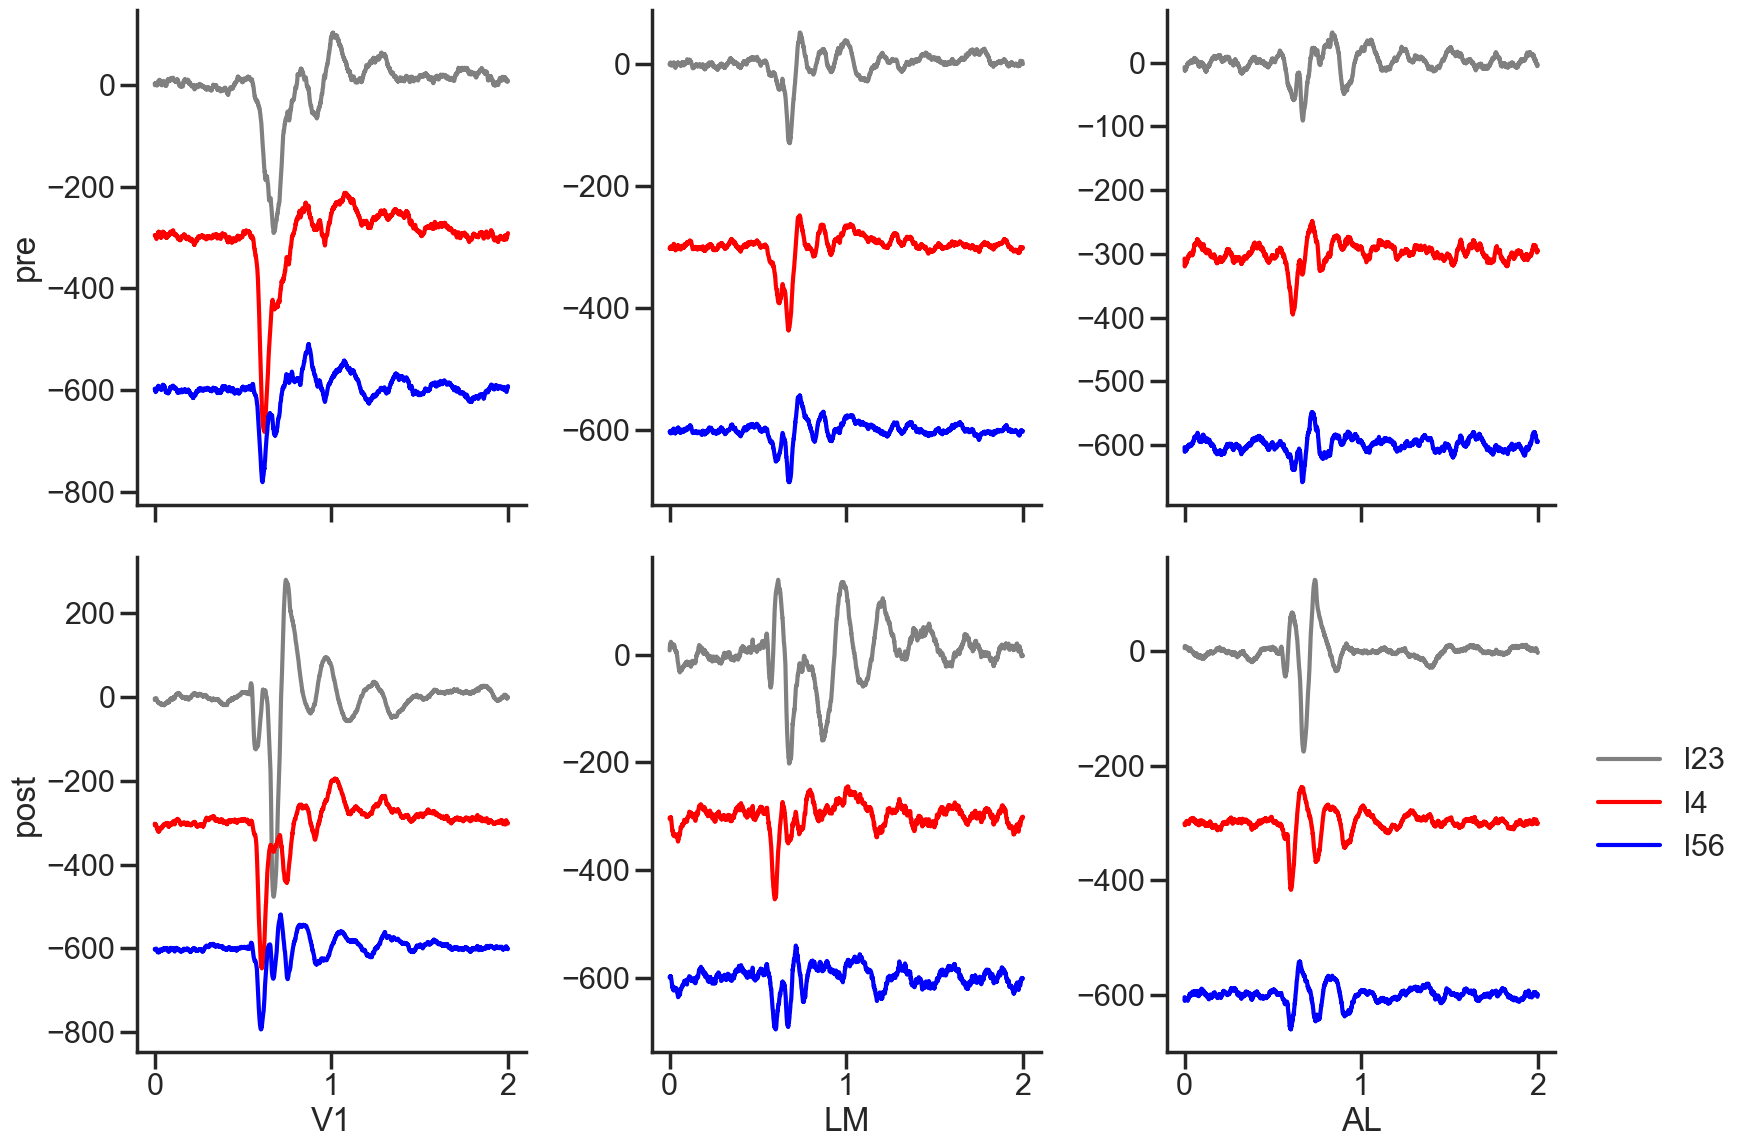

In [32]:
times=np.linspace(0,2.0,2000)

## stim time window
a,b = 0.5,0.7
# sns.set_context('poster')
ALparam=6,0.03
LMparam=0.75,0.12
param_r=ALparam
alllayer_all.sort_values(['region','pre_post'],inplace=True, ascending=True)
f,ax=plt.subplots(2,3,figsize=(18,12), sharex=True, sharey=False)

# rg='LM'
tmp=alllayer_all[                 
                 (~alllayer_all.et.str.contains('|'.join(training_stim['LM'])))
                 &(alllayer_all.tf==param_r[0])
                 &(alllayer_all.sf==param_r[1])
                 &(~alllayer_all.et.str.contains('|'.join(['67','68','61']))) ## exclude PVcrexchr2 mice
                 &(~alllayer_all.et.str.contains('|'.join(['75','76','32']))) ## exclude LM archT mice
           ]
print('pre',len(tmp[tmp.pre_post=='pre'].et.unique()),
     'post',len(tmp[tmp.pre_post=='post'].et.unique())
     )

for ix, pp in enumerate(['pre','post']):
    tmp1=tmp[tmp.pre_post==pp]
    for i, rg in enumerate(['V1','LM'
                            ,'AL'
                           ]):
        tmp2=tmp1[(tmp1.region==rg)]
        lfp23=[i for i in tmp2.l23.values if len(i)!=0]
        lfp4=[i for i in tmp2.l4.values if len(i)!=0]
        lfp56=[i for i in tmp2.l56.values if len(i)!=0]
        
        l23=np.stack([l[l.mean(axis=1)[:,550:1500].min(axis=1).argmin()
                                        ].mean(axis=0) for l in lfp23])
        
        l4=np.stack([l[l.mean(axis=1)[:,550:650].min(axis=1).argmin()
                                        ].mean(axis=0) for l in lfp4])
       
        l56=np.stack([l[l.mean(axis=1)[:,550:1500].min(axis=1).argmin()
                                        ].mean(axis=0) for l in lfp56])
#         print(pp,rg,l23.shape, l4.shape,l56.shape)
        
      
        avglfp23=np.nanmean(l23,axis=0)
        avglfp4=np.nanmean(l4,axis=0)
        avglfp56=np.nanmean(l56,axis=0)
        
        ax[ix][i].plot(times,avglfp23, 'gray',label='l23')
        ax[ix][i].plot(times,avglfp4-300, 'red',label='l4')
        ax[ix][i].plot(times,avglfp56-300*2, 'blue',label='l56')

        ax[ix][i].legend('',frameon=False)
        ax[-1][i].set_xlabel(rg)
        sns.despine()
    ax[ix][0].set_ylabel(str(pp))
ax[-1][-1].legend(loc='center left', bbox_to_anchor=(1.04, 0.5), ncol=1,frameon=False)  
plt.tight_layout()



In [252]:
dfls=[]
for ix, pp in enumerate(['pre','post']):
    tmp1=tmp[tmp.pre_post==pp]
    for i, rg in enumerate(['V1','LM'
                            ,'AL'
                           ]):
        tmp2=tmp1[(tmp1.region==rg)
                 ]
        lfp23=[i for i in tmp2.l23.values if len(i)!=0]
        lfp4=[i for i in tmp2.l4.values if len(i)!=0]
        lfp56=[i for i in tmp2.l56.values if len(i)!=0]
        
       
        l23=np.stack([l[l.mean(axis=1)[:,550:1500].min(axis=1).argmin()
                                        ].mean(axis=0) for l in lfp23])
        
        l4=np.stack([l[l.mean(axis=1)[:,550:650].min(axis=1).argmin()
                                        ].mean(axis=0) for l in lfp4])
       
        l56=np.stack([l[l.mean(axis=1)[:,550:1500].min(axis=1).argmin()
                                        ].mean(axis=0) for l in lfp56])
        
        tmpls=[l23,l4,l56]
        for ii,l in enumerate(tmpls):
            peaks=[detect_peaks((ll[500:1500]),mph=50,mpd=50,valley=True) for ll in l]
#             veps=np.array([np.median((ll[500:1500])[peak]) for peak,ll in list(zip(peaks,l))])
            peak4=[(peak[(peak>0)&(peak<200)],peak[(peak>200)&(peak<400)]
                    ,peak[(peak>400)&(peak<600)]
                    ,peak[(peak>600)&(peak<800)],peak[(peak>800)&(peak<1000)]) 
                   for peak in peaks]
            peaks2=[detect_peaks((ll[500:1500]),mph=30,mpd=50,valley=False) for ll in l]
#             veps2=np.array([np.median((ll[500:1500])[peak]) for peak,ll in list(zip(peaks2,l))])
            peak42=[(peak[(peak>0)&(peak<200)],peak[(peak>200)&(peak<400)]
                    ,peak[(peak>400)&(peak<600)]
                    ,peak[(peak>600)&(peak<800)],peak[(peak>800)&(peak<1000)]) 
                   for peak in peaks2]
            ls=[]
            for peak,peak2,ll in list(zip(peak4,peak42,l)):
                veps=[]
                for j,p in enumerate(list(zip(peak,peak2))):
                    if len(p[0]) and len(p[1]):
                        veps.append((ll[500:1500])[p[0]].min()-(ll[500:1500])[p[1]].max())

                    else:
                        veps.append((ll[500:1500])[j*200:(j+1)*200].min())
                veps=np.array(veps)
                ls.append(veps)
            veps=[np.min(vep) for vep in ls]

            vepdf=pd.DataFrame({'vep':veps
                                 ,'rec':np.arange(len(veps))
                                 ,'region':rg
                                 ,'pre_post':pp
                                 ,'ly':ii
                                 })
            dfls.append(vepdf)
vepdf=pd.concat(dfls)
vepdf.head()

,vep,rec,region,pre_post,ly
0,-373.20,0,V1,pre,0
1,-232.55,1,V1,pre,0
2,-217.60,2,V1,pre,0
3,-476.90,3,V1,pre,0
4,-289.55,4,V1,pre,0


In [54]:
import pingouin as pg

C:\Users\tangy\anaconda3\envs\neurosig\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
C:\Users\tangy\anaconda3\envs\neurosig\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [254]:
ls=[]
for n,g in vepdf.groupby(['region','ly']):
    stat=pg.mwu(g[g.pre_post=='pre'].vep,g[g.pre_post=='post'].vep)
    stat['region']=n[0]
    stat['ly']=n[1]
    stat['prenrec']=g[g.pre_post=='pre'].rec.nunique()
    stat['postnrec']=g[g.pre_post=='post'].rec.nunique()
    ls.append(stat)
statdf=pd.concat(ls)
ls=[]
for n,g in statdf.groupby(['region']):
    g['pcorr']=pg.multicomp(g['p-val'].values,method='fdr_bh')[-1]
    ls.append(g)
statdf=pd.concat(ls)
statdf

,U-val,alternative,p-val,RBC,CLES,region,ly,prenrec,postnrec,pcorr
MWU,343.0,two-sided,0.568179,0.092593,0.453704,AL,0,36,21,0.852269
MWU,373.0,two-sided,0.940657,0.013228,0.493386,AL,1,36,21,0.940657
MWU,320.0,two-sided,0.341490,0.153439,0.423280,AL,2,36,21,0.852269
MWU,792.0,two-sided,0.207698,-0.173333,0.586667,LM,0,45,30,0.306783
MWU,580.0,two-sided,0.306783,0.140741,0.429630,LM,1,45,30,0.306783
MWU,510.5,two-sided,0.100912,0.226515,0.386742,LM,2,44,30,0.302736
MWU,1882.0,two-sided,0.000956,-0.375731,0.687865,V1,0,57,48,0.001434
MWU,1983.0,two-sided,0.000077,-0.449561,0.724781,V1,1,57,48,0.000232
MWU,1729.0,two-sided,0.012171,-0.286458,0.643229,V1,2,56,48,0.012171


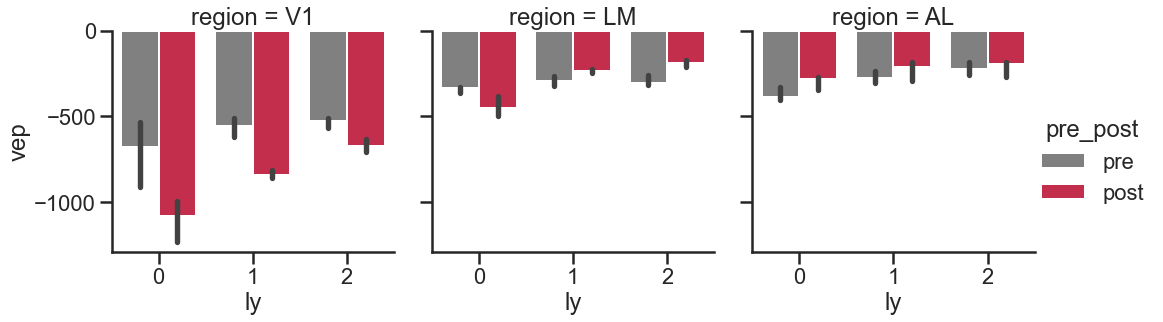

In [256]:
sns.catplot(x='ly',y='vep',data=vepdf
           ,hue='pre_post'
            ,col='region',col_order=['V1','LM','AL']
            ,kind='bar',estimator=np.median,ci=68,
           )
# plt.savefig(report_directory+name+'infigure1v0.5/ALtraining_LFP500-1500medianvep_minlfp.pdf', transparent=True)#, bbox_extra_artists=(lgd,), bbox_inches='tight')
# plt.savefig(report_directory+name+'infigure1v0.5/ALtraining_LFP500-1500medianvep_minlfp.png', transparent=True)#, bbox_extra_artists=(lgd,), bbox_inches='tight')


In [257]:
# f,ax=plt.subplots(2,3,figsize=(18,12), sharex=True, sharey=False)

# rg='LM'
tmp=alllayer_all[
                 (~alllayer_all.et.str.contains('|'.join(rec_to_exclude)))
                 &(~alllayer_all.et.str.contains('|'.join(training_stim['AL'])))
           ]
print('pre',len(tmp[tmp.pre_post=='pre'].et.unique()),
     'post',len(tmp[tmp.pre_post=='post'].et.unique())
     )

ls=[]
for ix, pp in enumerate(['pre','post']):
    tmp1=tmp[tmp.pre_post==pp]
    for i, rg in enumerate(['V1','LM'
                            ,'AL'
                           ]):
        tmp2=tmp1[(tmp1.region==rg)
                  &(~tmp1.et.str.contains('|'.join(['67','68','61','75','76'])))
                 ]
        for n,g in tmp2.groupby(['tf','sf']):
            lfp23=[i for i in g.l23.values if len(i)!=0]
            lfp4=[i for i in g.l4.values if len(i)!=0]
            lfp56=[i for i in g.l56.values if len(i)!=0]
            
            l23=np.stack([l[l.mean(axis=1)[:,550:1500].min(axis=1).argmin()
                                        ].mean(axis=0) for l in lfp23])
        
            l4=np.stack([l[l.mean(axis=1)[:,550:650].min(axis=1).argmin()
                                            ].mean(axis=0) for l in lfp4])

            l56=np.stack([l[l.mean(axis=1)[:,550:1500].min(axis=1).argmin()
                                            ].mean(axis=0) for l in lfp56])

            tmpls=[l23,l4,l56]
            fls=[]
            pspecls=[]
            for x,i in enumerate(tmpls):
                for y,ii in enumerate(i):
                    f,pspec = scipy.signal.welch(ii[500:1200], fs=1000., window='hanning'
                                          , nperseg=700.
                                          , noverlap=700./4
    #                                       , nfft=None
    #                                       , detrend='linear'
                                          , return_onesided=True
                                          , scaling='spectrum')
                    tmpdf=pd.DataFrame({'tf':n[0],
                                        'sf':n[1],
                                        'pre_post':pp,
                                        'region':rg,
                                        'frex':f,
                                        'ly':x,
                                        'dB':10*np.log(pspec),
                                        'rec':y,
#                                         'pspec':pspec
                                       })
                    ls.append(tmpdf)
pspecdf=pd.concat(ls)
pspecdf.head()

pre 25 post 24


,tf,sf,pre_post,region,frex,ly,dB,rec
0,0.75,0.015,pre,V1,0.000000,0,60.971883,0
1,0.75,0.015,pre,V1,1.428571,0,80.788709,0
2,0.75,0.015,pre,V1,2.857143,0,75.208790,0
3,0.75,0.015,pre,V1,4.285714,0,71.238333,0
4,0.75,0.015,pre,V1,5.714286,0,62.942786,0


In [259]:
ls=[]
value='dB'
for n,g in pspecdf.groupby(['pre_post','region','ly']):
    theta=g[g.frex.between(4,8)].groupby(['pre_post','region','ly','rec','tf','sf'])[value].median().to_frame('dB').reset_index()
    theta['frex']='4-8'
    alpha=g[g.frex.between(8,12)].groupby(['pre_post','region','ly','rec','tf','sf'])[value].median().to_frame('dB').reset_index()
    alpha['frex']='8-12'
    beta=g[g.frex.between(12,30)].groupby(['pre_post','region','ly','rec','tf','sf'])[value].median().to_frame('dB').reset_index()
    beta['frex']='12-30'
    lowgamma=g[g.frex.between(30,50)].groupby(['pre_post','region','ly','rec','tf','sf'])[value].median().to_frame('dB').reset_index()
    lowgamma['frex']='30-50'
    highgamma=g[g.frex.between(50,80)].groupby(['pre_post','region','ly','rec','tf','sf'])[value].median().to_frame('dB').reset_index()
    highgamma['frex']='50-80'
    ls.append(pd.concat([theta,alpha,beta,lowgamma,highgamma]))
tmpdf=pd.concat(ls)
tmpdf.head()

,pre_post,region,ly,rec,tf,sf,dB,frex
0,post,AL,0,0,0.75,0.015,45.604111,4-8
1,post,AL,0,0,0.75,0.030,67.510897,4-8
2,post,AL,0,0,0.75,0.060,62.576644,4-8
3,post,AL,0,0,0.75,0.120,56.467308,4-8
4,post,AL,0,0,0.75,0.240,67.349885,4-8


In [260]:
rgheats={'V1':'gray_r','LM':'Reds','AL':'Blues'}

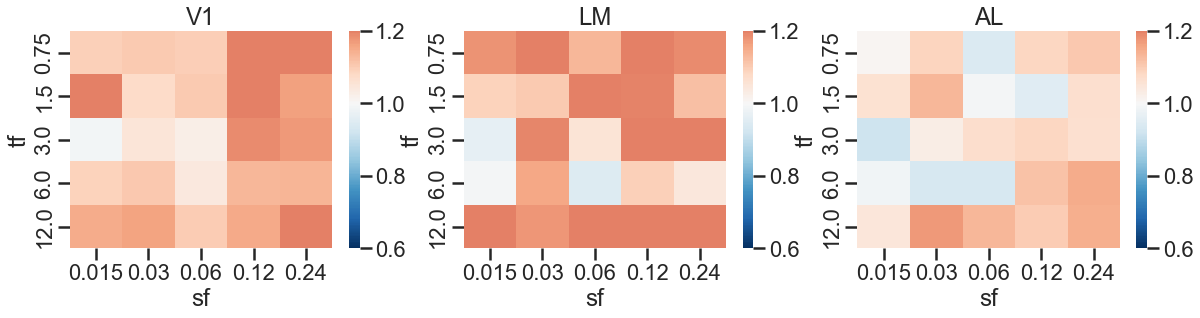

In [264]:
# from matplotlib.colors import LogNorm, Normalize
from matplotlib.colors import LogNorm, Normalize
class MidPointLogNorm(LogNorm):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        LogNorm.__init__(self,vmin=vmin, vmax=vmax, clip=clip)
        self.midpoint=midpoint
    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [np.log(self.vmin), np.log(self.midpoint), np.log(self.vmax)], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(np.log(value), x, y))

test=tmpdf[(tmpdf.frex=='4-8')
          ]
ls=[]
for n,g in test.groupby(['rec','ly','region','pre_post']):
# for n,g in test.groupby(['rec','ly','region',]):
#     g['dB']=(g.dB-g.dB.min())/(g.dB.max()-g.dB.min())
#     g['dB']=scipy.stats.zscore(g.dB)
    g['dB']=g.dB#/g.dB.max()
#     if g.sf.nunique()==5:
    ls.append(g)
test=pd.concat(ls)
test.head()

f,ax=plt.subplots(1,3,figsize=(20,4))
for i,rg in enumerate(['V1','LM','AL']):
    hm=test[(test.region==rg)
            &(test.ly==0)
           ].groupby(['tf','sf','pre_post']).median().groupby(level=[0,1]
                                                             ).apply(lambda x:x.dB.iloc[0]/x.dB.iloc[1]
                                                                    ).to_frame('dB').reset_index().pivot('tf','sf','dB')
    sns.heatmap(hm,ax=ax[i]
#                 ,cmap=rgheats[rg]
                ,cmap='RdBu_r'
#                 ,norm=MidPointLogNorm(vmin=hm.min().min(), vmax=hm.max().max(), midpoint=1)
                ,vmin=0.6, vmax=1.2
                ,center=1
               )
    ax[i].set_title(rg)
#     sns.heatmap(hm1,ax=ax[0][i],cmap=rgheats[rg]
# #                 ,norm=LogNorm(60,100)
# #                 ,vmin=0.2, vmax=1
#                )
#     sns.heatmap(hm2,ax=ax[1][i],cmap=rgheats[rg]
# #                 ,norm=LogNorm(60,100)
# #                 ,vmin=0.2, vmax=1
#                )
#     ax[0][i].set_title(rg)
# plt.savefig(report_directory+'tf/ALtraining_freq500-1200welchdBpost2pre_tfsf.png')
# plt.savefig(report_directory+'tf/ALtraining_freq500-1200welchdBpost2pre_tfsf.pdf')

('AL', 0)


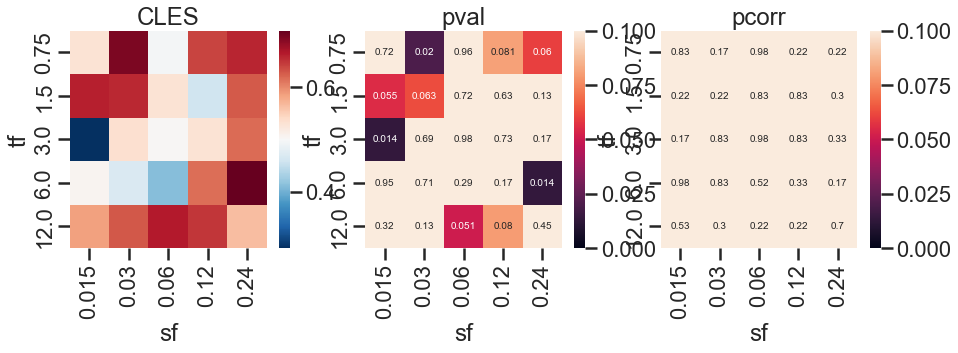

('LM', 0)


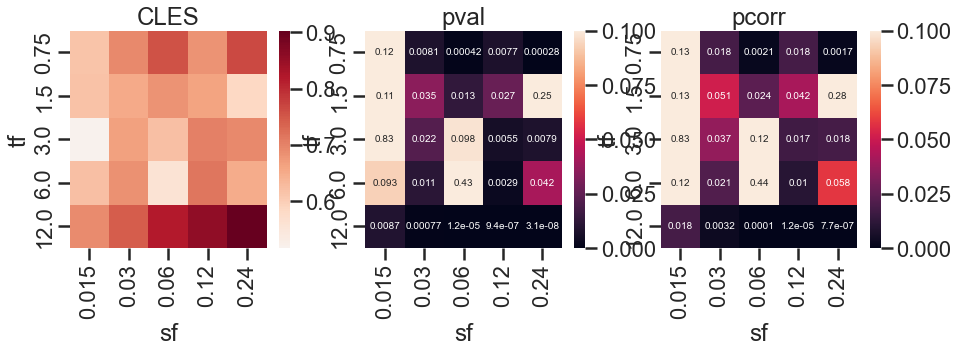

('V1', 0)


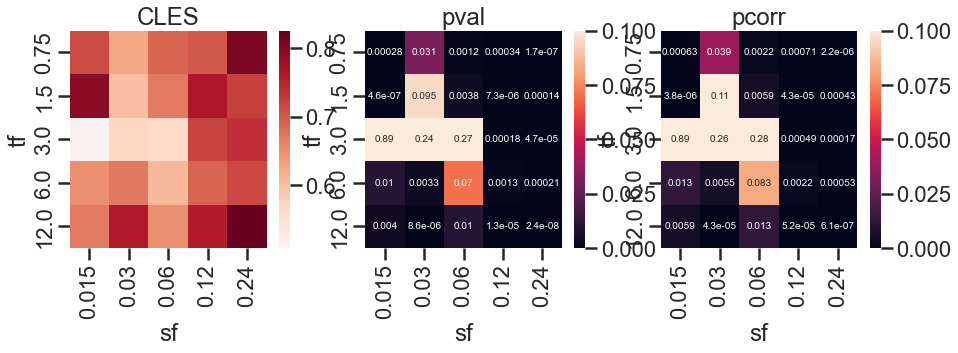

In [265]:
ls=[]

for n,g in test[test.ly==0].groupby(['ly','region','tf','sf']):
#     print(n)
    stat=pg.mwu(g[g.pre_post=='post'].dB,g[g.pre_post=='pre'].dB)
    stat=stat.join(pd.DataFrame(dict(zip(['ly','region','tf','sf'],n)),index=['MWU']))
    ls.append(stat)
stats=pd.concat(ls)
def pcorrection(g):
    pcorr=pg.multicomp(g['p-val'].values,method='fdr_bh')[-1]
    g['pcorr']=pcorr
    return g
stats=stats.groupby(['region','ly']).apply(lambda x:pcorrection(x))
# stats.to_csv(report_directory+'tf/ALtraining_freq500-1200welchdBpost2pre_tfsf_mwustats.csv')

for n,g in stats.groupby(['region','ly']):
    cleshm=g.pivot('tf','sf','CLES'
              )
    pvalhm=g.pivot('tf','sf','p-val'
              )
    pcorrhm=g.pivot('tf','sf','pcorr'
              )
    print(n)
    f,ax=plt.subplots(1,3,figsize=(15,4))
    sns.heatmap(cleshm,cmap='RdBu_r',center=0.5,ax=ax[0])
    ax[0].set_title('CLES')
    sns.heatmap(pvalhm,ax=ax[1],vmax=0.1,vmin=0,annot=pvalhm,annot_kws={"fontsize":10})
    ax[1].set_title('pval')
    sns.heatmap(pcorrhm,ax=ax[2],vmax=0.1,vmin=0,annot=pcorrhm,annot_kws={"fontsize":10})
    ax[2].set_title('pcorr')
#     plt.savefig(report_directory+'tf/ALtraining_freq500-1200welchdBpost2pre_tfsf_'+n[0]+'ly'+str(n[1])+'mwustats.png')
    plt.show()

In [267]:
ls=[]
var='sf'
for n,g in test.groupby(['region',var,'pre_post','frex','ly','rec']
                       ).dB.mean().reset_index().groupby(['region']):
    print(n)
    tmpls=[]
    for nn,gg in g.groupby(var):
        stat=pg.mwu(gg[gg.pre_post=='pre'].dB, gg[gg.pre_post=='post'].dB)
        stat[var]=nn
        stat['prenrec']=gg[gg.pre_post=='pre'].rec.nunique()
        stat['postnrec']=gg[gg.pre_post=='post'].rec.nunique()
        tmpls.append(stat)
    stats=pd.concat(tmpls)
    stats['region']=n
    stats['pvals_corr'] = pg.multicomp(stats['p-val'].values, method='fdr_bh')[-1]
    ls.append(stats)
statdf=pd.concat(ls)
# statdf.to_csv(report_directory+'tf/LMtraining_freq500-1200welchdB_'+var+'db_stats.csv')
statdf  

AL
LM
V1


,U-val,alternative,p-val,RBC,CLES,sf,prenrec,postnrec,region,pvals_corr
MWU,3190.0,two-sided,3.311851e-01,-0.093964,0.546982,0.015,36,18,AL,4.139814e-01
MWU,3032.0,two-sided,6.815384e-01,-0.039781,0.519890,0.030,36,18,AL,6.815384e-01
MWU,3278.0,two-sided,1.990061e-01,-0.124143,0.562071,0.060,36,18,AL,3.316768e-01
MWU,2977.0,two-sided,1.740450e-01,0.124927,0.437537,0.120,36,21,AL,3.316768e-01
MWU,2435.0,two-sided,8.778704e-02,0.164952,0.417524,0.240,36,18,AL,3.316768e-01
MWU,5043.0,two-sided,8.082049e-01,0.020396,0.489802,0.015,48,24,LM,8.082049e-01
MWU,4603.0,two-sided,2.059373e-01,0.105866,0.447067,0.030,48,24,LM,3.432288e-01
MWU,4445.0,two-sided,1.027146e-01,0.136558,0.431721,0.060,48,24,LM,2.567865e-01
MWU,5924.0,two-sided,3.081863e-01,0.079409,0.460295,0.120,48,30,LM,3.852328e-01
MWU,4212.0,two-sided,2.977522e-02,0.181818,0.409091,0.240,48,24,LM,1.488761e-01


In [268]:
param_r=LMparam
ls=[]
for n,g in tmpdf[(tmpdf.tf==param_r[0])
                &(tmpdf.sf==param_r[1])
                ].groupby(['region','ly']):
    print(n)
    tmpls=[]
    for nn,gg in g.groupby('frex'):
        stat=pg.mwu(gg[gg.pre_post=='pre'].dB, gg[gg.pre_post=='post'].dB)
        stat['region']=n[0]
        stat['ly']=n[1]
        stat['frex']=nn
        stat['prenrec']=gg[gg.pre_post=='pre'].rec.nunique()
        stat['postnrec']=gg[gg.pre_post=='post'].rec.nunique()
        tmpls.append(stat)
    stats=pd.concat(tmpls)
    stats['pvals_corr'] = pg.multicomp(stats['p-val'].values, method='fdr_bh')[-1]
    ls.append(stats)
statdf=pd.concat(ls)
# statdf.to_csv(report_directory+'tf/LMtraining_freq500-1200welchdB_stats_LMparams.csv')
statdf

('AL', 0)
('AL', 1)
('AL', 2)
('LM', 0)
('LM', 1)
('LM', 2)
('V1', 0)
('V1', 1)
('V1', 2)


,U-val,alternative,p-val,RBC,CLES,region,ly,frex,prenrec,postnrec,pvals_corr
MWU,483.0,two-sided,0.083854,-0.277778,0.638889,AL,0,12-30,36,21,0.096397
MWU,481.0,two-sided,0.089950,-0.272487,0.636243,AL,0,30-50,36,21,0.096397
MWU,272.0,two-sided,0.080934,0.280423,0.359788,AL,0,4-8,36,21,0.096397
MWU,578.0,two-sided,0.000966,-0.529101,0.764550,AL,0,50-80,36,21,0.004828
MWU,277.0,two-sided,0.096397,0.267196,0.366402,AL,0,8-12,36,21,0.096397
MWU,547.0,two-sided,0.005312,-0.447090,0.723545,AL,1,12-30,36,21,0.008853
MWU,614.0,two-sided,0.000098,-0.624339,0.812169,AL,1,30-50,36,21,0.000489
MWU,297.0,two-sided,0.182954,0.214286,0.392857,AL,1,4-8,36,21,0.182954
MWU,548.0,two-sided,0.005047,-0.449735,0.724868,AL,1,50-80,36,21,0.008853
MWU,272.0,two-sided,0.080934,0.280423,0.359788,AL,1,8-12,36,21,0.101167


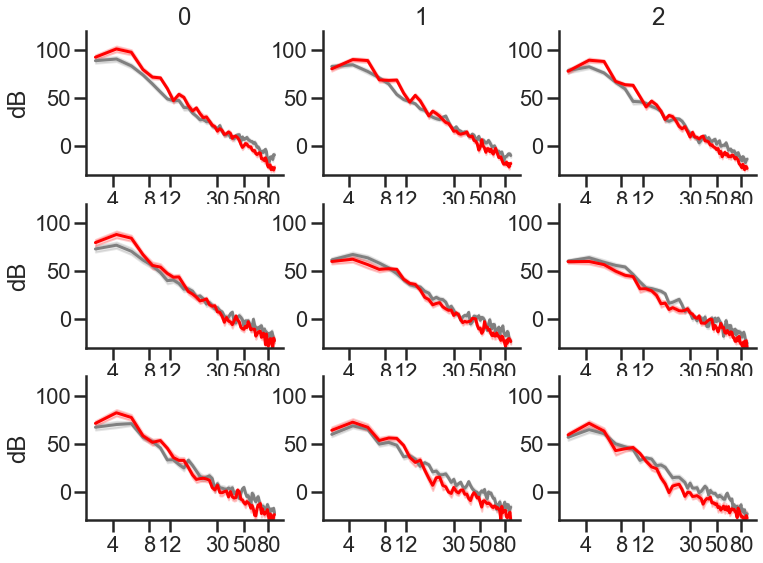

In [250]:
# for n,g in pspecdf.groupby(['region']):
#     print(n)
#     sns.lineplot(x='frex',y='pspec',data=g[g.ly==2],hue='pre_post'
#                  ,estimator=np.mean,ci=68)
#     plt.xlim(0,30)
#     plt.show()
f,ax=plt.subplots(3,3,figsize=(12,9))
# ax.set(xscale="log")

for i,rg in enumerate(['V1','LM','AL']):
    tm1=pspecdf[pspecdf.region==rg]
    for ii,ly in enumerate([0,1,2]):
        tm2=tm1[tm1.ly==ly]
        tmp=tm2[tm2.frex.between(2,90)
                 &(tm2.tf==param_r[0])
                  &(tm2.sf==param_r[1])
                 ].groupby(['pre_post','frex']).dB.mean().to_frame('dB').reset_index()
        tmpsem=tm2[tm2.frex.between(2,90)
                 &(tm2.tf==param_r[0])
                  &(tm2.sf==param_r[1])
                 ].groupby(['pre_post','frex']).dB.sem().to_frame('sem').reset_index()
        ax[i][ii].plot(tmp[tmp.pre_post=='pre'].frex,tmp[tmp.pre_post=='pre'].dB,color='gray')
        ax[i][ii].fill_between(tmp[tmp.pre_post=='pre'].frex,tmp[tmp.pre_post=='pre'].dB-tmpsem[tmpsem.pre_post=='pre']['sem']
                         ,tmp[tmp.pre_post=='pre'].dB+tmpsem[tmpsem.pre_post=='pre']['sem']
                         ,color='gray',alpha=0.2)
        ax[i][ii].plot(tmp[tmp.pre_post=='post'].frex,tmp[tmp.pre_post=='post'].dB,color='red')
        ax[i][ii].fill_between(tmp[tmp.pre_post=='post'].frex,tmp[tmp.pre_post=='post'].dB-tmpsem[tmpsem.pre_post=='post']['sem']
                         ,tmp[tmp.pre_post=='post'].dB+tmpsem[tmpsem.pre_post=='post']['sem']
                         ,color='red',alpha=0.2)
#         ax[i][ii].set_xlim(0.5,30)
        ax[i][ii].set_ylim(-30,120)
        ax[i][ii].set(xscale="log")
        ax[i][ii].minorticks_off()
        ax[i][ii].set_xticks([4,8,12,30,50,80])#np.arange(0,50,4)[1:])
        ax[i][ii].set_xticklabels([4,8,12,30,50,80])#np.arange(0,50,4)[1:])
        ax[i][ii].set_xlabel('')
        ax[i][ii].set_ylabel('')
        ax[0][ii].set_title(ly)
        ax[i][ii].legend('',frameon=False)
        
#         ax[i][ii].set_xlabel('')
    ax[i][0].set_ylabel('dB')
#     ax[i][0].text(-10,10,rg)
    

sns.despine()
# f.gca().set_xscale('log')

# plt.savefig(report_directory+'tf/ALtraining_freq500-1200welchdB_ALparams.png')
# plt.savefig(report_directory+'tf/ALtraining_freq500-1200welchdB_ALparams.pdf')
    

lfp phase locking analyses

In [56]:
from scipy.fftpack import fft, ifft
### pay attention to max frequency
def calc_plv(x,y,num_samples=2000,):
    
    base_idx = [0, 400]
    min_freq = 2
    max_freq = 90
    num_frex = 40
    range_cycles = [3, 10]

    # data info
    Sampling_Rate = 1000.
    num_samples = 2000

    #frequencies vector
    frex = np.logspace(np.log10(min_freq),np.log10(max_freq),num_frex)
    time = np.linspace(0, num_samples, int(num_samples) )

    #wavelet parameters
    s = np.divide(np.logspace(np.log10(range_cycles[0]),np.log10(range_cycles[-1]),num_frex), 2*np.pi*frex)
    wavtime = np.linspace(-1, 1, 2*int(Sampling_Rate)+1)
    half_wave = (len(wavtime)-1)/2

    #FFT parameters
    nWave = len(wavtime)

    num_trials= x[:20].shape[0]
    nData = num_trials * num_samples
    nConv = [nWave+nData-1, nWave+nData-1 ,  nWave+num_samples-1 ]

    dataX = {}
    dataY = {}
#             #FFT of total data
    dataX[0] = fft( x[:20].flatten(), nConv[0])
    dataY[0] = fft( y[:20].flatten(), nConv[0])

    tf = np.zeros((len(frex), num_samples) )
    phd = np.zeros((len(frex), num_samples) )
    #main loop
    for fi in range(len(frex)):
        # create wavelet and get its FFT
        # the wavelet doesn't change on each trial...
        wavelet  = np.exp(2*1j*np.pi*frex[fi]*wavtime) * np.exp(-wavtime**2/(2*s[fi]**2))    

        # need separate FFT 
        waveletX = fft(wavelet,nConv[0])
        waveletX = waveletX / max(waveletX)

        # notice that the fft_EEG cell changes on each iteration
        a_sig = ifft(waveletX*dataX[0],nConv[0])
        b_sig = ifft(waveletX*dataY[0],nConv[0])

        a_sig = a_sig[int(half_wave): int(len(a_sig)-half_wave)]
        b_sig = b_sig[int(half_wave): int(len(b_sig)-half_wave)]
        aphase = (np.angle(a_sig)+2*np.pi)%(2*np.pi)
        bphase = (np.angle(b_sig)+2*np.pi)%(2*np.pi)
        phased = aphase - bphase
#         phd[fi,:]=(phased.reshape(-1,2000))
        phd[fi,:]=pg.circ_mean(((phased.reshape(-1,2000)+2*np.pi)%(2*np.pi)))
        tf[fi,:]=np.abs(np.exp(1j*phased).reshape(-1,2000).sum(axis=0))/(phased.reshape(-1,2000).shape[0])
        
    return tf, phd

In [60]:
alllayer_all.head()

,et,pre_post,region,l4,l23,l56,sf,tf,shank
0,ET#012_left,pre,LM,"[[[80, 169, 139, 119, 65, 44, 43, 20, -5, -23,...","[[[72, 181, 163, 140, 106, 97, 85, 86, 81, 75,...","[[[94, 191, 189, 159, 114, 103, 86, 76, 56, 62...",0.015,0.75,2
0,ET#012_left,pre,LM,"[[[-33, -56, -52, -89, -78, -105, -101, -104, ...","[[[19, 57, 72, 36, 27, 7, 28, 23, 22, 20, 39, ...","[[[-42, -87, -74, -105, -87, -124, -151, -134,...",0.015,1.50,2
0,ET#012_left,pre,LM,"[[[-2, 5, 11, 11, 29, 21, 17, 11, -22, -57, -9...","[[[-47, -100, -86, -86, -81, -85, -85, -101, -...","[[[8, 22, 22, 36, 20, 14, -2, -35, -63, -95, -...",0.015,12.00,2
0,ET#012_left,pre,LM,"[[[-37, -81, -62, -56, -24, -32, -19, 0, -7, 1...","[[[15, 45, 74, 111, 154, 189, 184, 220, 208, 1...","[[[-33, -75, -54, -28, 9, 40, 29, 34, 35, 56, ...",0.015,3.00,2
0,ET#012_left,pre,LM,"[[[-63, -122, -111, -113, -100, -104, -94, -10...","[[[-259, -534, -452, -491, -444, -458, -427, -...","[[[-54, -97, -64, -77, -56, -52, -31, -39, 2, ...",0.015,6.00,2


In [63]:
# import itertools
data=alllayer_all[~(alllayer_all.et.str.contains('|'.join(training_stim['AL'])))
                 ]
for n,g in data.groupby(['et','pre_post']):
    plvdic=[]
    print(n)
    for nn,gg in g.groupby(['sf','tf']):
        print(nn)
        if 'V1' in gg.region.unique() and 'AL' in g.region.unique():
            for lpair in np.array(np.meshgrid(gg.columns[3:6],gg.columns[3:6])).T.reshape(-1,2):
                l4v1=[i for i in gg[gg.region=='V1'][lpair[0]].values if len(i)!=0]
                l4v1=[l[l.mean(axis=1)[:,550:1500].min(axis=1).argmin()
                                                        ] for l in l4v1]
#                 l4v1=[l[l.mean(axis=1)[:,550:].min(axis=1).argsort()[l.shape[0]//2]
#                                                 ] for l in l4v1]
                l4lm=[i for i in gg[gg.region=='AL'][lpair[1]].values if len(i)!=0]
                l4lm=[l[l.mean(axis=1)[:,550:1500].min(axis=1).argmin()
                                                    ] for l in l4lm]
#                 l4lm=[l[l.mean(axis=1)[:,550:].min(axis=1).argsort()[l.shape[0]//2]
#                                                 ] for l in l4lm]
                pairs=np.array(np.meshgrid(range(len(l4v1)),range(len(l4lm)))).T.reshape(-1,2)
                ls=[]
                ls1=[]
                for pair in pairs:
                    x=l4v1[pair[0]]
                    y=l4lm[pair[1]]
                    tf,phd=calc_plv(x,y)
                    ls.append(tf)
                    ls1.append(phd)
                plvdic.append(n+nn+(tuple(['V1','AL']),lpair,np.array(ls),np.array(ls1)))
#         break
    tmpdf=pd.DataFrame(plvdic, columns=['et','pre_post','sf','tf','recpair','lpair','plv','phsdiff'])
#     break
#     tmpdf.to_pickle(report_directory+'/plv/2-90Hz/'+n[0]+'_'+n[1]+'_v1alplv.pkl')
#     break
    

('ET#012_left', 'pre')
(0.015, 0.75)
(0.015, 1.5)
(0.015, 3.0)
(0.015, 6.0)
(0.015, 12.0)
(0.03, 0.75)
(0.03, 1.5)
(0.03, 3.0)
(0.03, 6.0)
(0.03, 12.0)
(0.06, 0.75)
(0.06, 1.5)
(0.06, 3.0)
(0.06, 6.0)
(0.06, 12.0)
(0.12, 0.75)
(0.12, 1.5)
(0.12, 3.0)
(0.12, 6.0)
(0.12, 12.0)
(0.24, 0.75)
(0.24, 1.5)
(0.24, 3.0)
(0.24, 6.0)
(0.24, 12.0)
('ET#013_left', 'pre')
(0.015, 0.75)
(0.015, 1.5)
(0.015, 3.0)
(0.015, 6.0)
(0.015, 12.0)
(0.03, 0.75)
(0.03, 1.5)
(0.03, 3.0)
(0.03, 6.0)
(0.03, 12.0)
(0.06, 0.75)
(0.06, 1.5)
(0.06, 3.0)
(0.06, 6.0)
(0.06, 12.0)
(0.12, 0.75)
(0.12, 1.5)
(0.12, 3.0)
(0.12, 6.0)
(0.12, 12.0)
(0.24, 0.75)
(0.24, 1.5)
(0.24, 3.0)
(0.24, 6.0)
(0.24, 12.0)
('ET#014_left', 'pre')
(0.015, 0.75)
(0.015, 1.5)
(0.015, 3.0)
(0.015, 6.0)
(0.015, 12.0)
(0.03, 0.75)
(0.03, 1.5)
(0.03, 3.0)
(0.03, 6.0)
(0.03, 12.0)
(0.06, 0.75)
(0.06, 1.5)
(0.06, 3.0)
(0.06, 6.0)
(0.06, 12.0)
(0.12, 0.75)
(0.12, 1.5)
(0.12, 3.0)
(0.12, 6.0)
(0.12, 12.0)
(0.24, 0.75)
(0.24, 1.5)
(0.24, 3.0)
(0.24, 6.0)

(0.015, 1.5)
(0.015, 3.0)
(0.015, 6.0)
(0.015, 12.0)
(0.03, 0.75)
(0.03, 1.5)
(0.03, 3.0)
(0.03, 6.0)
(0.03, 12.0)
(0.06, 0.75)
(0.06, 1.5)
(0.06, 3.0)
(0.06, 6.0)
(0.06, 12.0)
(0.12, 0.75)
(0.12, 1.5)
(0.12, 3.0)
(0.12, 6.0)
(0.12, 12.0)
(0.24, 0.75)
(0.24, 1.5)
(0.24, 3.0)
(0.24, 6.0)
(0.24, 12.0)
('ET#052_right', 'post')
(0.015, 0.75)
(0.015, 1.5)
(0.015, 3.0)
(0.015, 6.0)
(0.015, 12.0)
(0.03, 0.75)
(0.03, 1.5)
(0.03, 3.0)
(0.03, 6.0)
(0.03, 12.0)
(0.06, 0.75)
(0.06, 1.5)
(0.06, 3.0)
(0.06, 6.0)
(0.06, 12.0)
(0.12, 0.75)
(0.12, 1.5)
(0.12, 3.0)
(0.12, 6.0)
(0.12, 12.0)
(0.24, 0.75)
(0.24, 1.5)
(0.24, 3.0)
(0.24, 6.0)
(0.24, 12.0)
('ET#054_left', 'post')
(0.015, 0.75)
(0.015, 1.5)
(0.015, 3.0)
(0.015, 6.0)
(0.015, 12.0)
(0.03, 0.75)
(0.03, 1.5)
(0.03, 3.0)
(0.03, 6.0)
(0.03, 12.0)
(0.06, 0.75)
(0.06, 1.5)
(0.06, 3.0)
(0.06, 6.0)
(0.06, 12.0)
(0.12, 0.75)
(0.12, 1.5)
(0.12, 3.0)
(0.12, 6.0)
(0.12, 12.0)
(0.24, 0.75)
(0.24, 1.5)
(0.24, 3.0)
(0.24, 6.0)
(0.24, 12.0)
('ET#054_right', 'po

In [312]:
import glob
ls=[]
plvfiles=glob.glob(report_directory+'/plv/2-90Hz/*v1alplv.pkl')
for f in plvfiles:
    print(f)
    tmpdf=pd.read_pickle(f)
#     tmpdf=tmpdf.drop(columns=['phsdiff'])
#     tmpdf=tmpdf.drop(columns=['plv'])
    tmpdf.lpair=tmpdf.lpair.transform(lambda x:(x[0],x[1]))
    tmpdf=tmpdf[(tmpdf.lpair==('l23', 'l23'))
#                &(~((tmpdf.sf==0.03)&(tmpdf.tf==6)))
               ]

    ls.append(tmpdf)
plvdf=pd.concat(ls)
plvdf.head()

u:\Data\tang232\V1+LM\report\dur200bpn//plv/2-90Hz\ET#012_left_pre_v1alplv.pkl
u:\Data\tang232\V1+LM\report\dur200bpn//plv/2-90Hz\ET#013_left_pre_v1alplv.pkl
u:\Data\tang232\V1+LM\report\dur200bpn//plv/2-90Hz\ET#014_left_pre_v1alplv.pkl
u:\Data\tang232\V1+LM\report\dur200bpn//plv/2-90Hz\ET#016_left_pre_v1alplv.pkl
u:\Data\tang232\V1+LM\report\dur200bpn//plv/2-90Hz\ET#016_right_pre_v1alplv.pkl
u:\Data\tang232\V1+LM\report\dur200bpn//plv/2-90Hz\ET#017_left_pre_v1alplv.pkl
u:\Data\tang232\V1+LM\report\dur200bpn//plv/2-90Hz\ET#017_right_pre_v1alplv.pkl
u:\Data\tang232\V1+LM\report\dur200bpn//plv/2-90Hz\ET#019_left_pre_v1alplv.pkl
u:\Data\tang232\V1+LM\report\dur200bpn//plv/2-90Hz\ET#019_right_pre_v1alplv.pkl
u:\Data\tang232\V1+LM\report\dur200bpn//plv/2-90Hz\ET#020_left_pre_v1alplv.pkl
u:\Data\tang232\V1+LM\report\dur200bpn//plv/2-90Hz\ET#020_right_pre_v1alplv.pkl
u:\Data\tang232\V1+LM\report\dur200bpn//plv/2-90Hz\ET#021_left_pre_v1alplv.pkl
u:\Data\tang232\V1+LM\report\dur200bpn//plv/2-90

,et,pre_post,sf,tf,recpair,lpair,plv,phsdiff
4,ET#019_left,pre,0.015,0.75,"(V1, AL)","(l23, l23)","[[[0.15755586076744094, 0.15606389664362086, 0...","[[[0.6728214882669002, 0.6755544620125761, 0.6..."
13,ET#019_left,pre,0.015,1.50,"(V1, AL)","(l23, l23)","[[[0.3180305306525011, 0.31823112983262775, 0....","[[[-0.03642349405325816, -0.032117463857983516..."
22,ET#019_left,pre,0.015,3.00,"(V1, AL)","(l23, l23)","[[[0.08797062577791452, 0.08644338490104764, 0...","[[[0.45960340663877547, 0.4700985358437662, 0...."
31,ET#019_left,pre,0.015,6.00,"(V1, AL)","(l23, l23)","[[[0.11483387877922313, 0.11379389193774306, 0...","[[[-0.996170806553399, -0.998895393711191, -1...."
40,ET#019_left,pre,0.015,12.00,"(V1, AL)","(l23, l23)","[[[0.13509348628567203, 0.13315449249977196, 0...","[[[2.1016849949152254, 2.1035781644876974, 2.1..."


In [42]:
base_idx = [0, 400]
min_freq = 2
max_freq = 90 #40,50
num_frex = 40
range_cycles = [3, 10]

# data info
Sampling_Rate = 1000.
num_samples = 2000

#frequencies vector
frex = np.logspace(np.log10(min_freq),np.log10(max_freq),num_frex)
time = np.linspace(0, num_samples, int(num_samples) )

C:\Users\tangy\AppData\Local\Temp/ipykernel_17736/1242655974.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(np.arange(0,2.0,0.5))


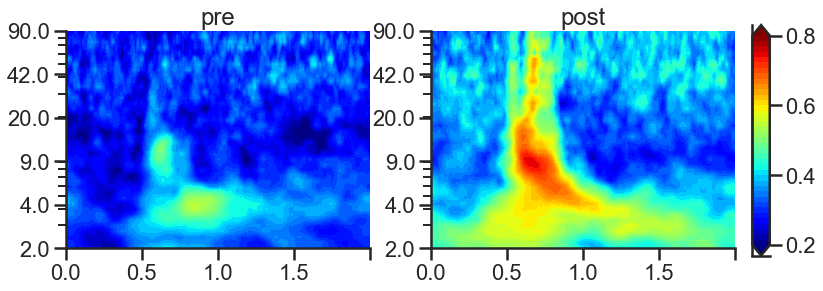

In [318]:
f,ax=plt.subplots(1,2,figsize=(12,4*1))
LMparam=0.75,0.12
ALparam=6,0.03
tf=ALparam[0]
sf=ALparam[1]
for i,pp in enumerate(['pre','post']):
#     print(n)
    tmp=plvdf[(~plvdf.et.str.contains('|'.join(['00','00'
                                              ])))
             &(~plvdf.et.str.contains('|'.join(training_stim['LM'])))
             ]
    tmp2=np.mean(np.stack([np.mean(i,axis=0) for i in tmp[(tmp.pre_post==pp)
                                    &(tmp.tf==tf)&(tmp.sf==sf)
                                                           ].plv.values]),axis=0)
    tf_plot = ax[i].contourf(time, frex, tmp2, cmap = 'jet' , extend = 'both',
                             levels=np.linspace(0.2,0.8,40)
                            )
    ax[i].set_yscale('log')
    ax[i].set_xticklabels(np.arange(0,2.0,0.5))
    ax[i].set_yticks(np.logspace(np.log10(min_freq),np.log10(max_freq),6))
    ax[i].set_yticklabels(np.round(np.logspace(np.log10(min_freq),np.log10(max_freq),6)))
    ax[i].set_title(pp)
    
cb_tf = f.add_axes([.92, 0.1, 0.02, 0.8])
cb_tf = f.colorbar(tf_plot,cax=cb_tf,ticks=np.arange(0,0.9,0.2))
# cbar = f.colorbar(tf_plot, ax=ax.ravel().tolist(), shrink=0.95)

# print(np.stack(tmp1.plv.values).shape[0])
sns.despine()
# plt.savefig(report_directory+'plv/ALtraining_v1l23all23phaselocking2.png')
# plt.savefig(report_directory+'plv/ALtraining_v1l23all23phaselocking2.pdf')

[(6, 40, 2000), (9, 40, 2000), (9, 40, 2000), (9, 40, 2000), (9, 40, 2000), (9, 40, 2000), (9, 40, 2000), (9, 40, 2000), (9, 40, 2000)]


C:\Users\tangy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(9, 40, 2000), (9, 40, 2000), (9, 40, 2000), (9, 40, 2000), (9, 40, 2000), (9, 40, 2000), (9, 40, 2000), (9, 40, 2000), (9, 40, 2000)]


C:\Users\tangy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


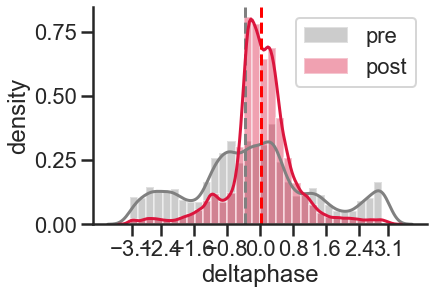

In [324]:
LMparam=0.75,0.12
ALparam=6,0.03
tf=ALparam[0]
sf=ALparam[1]
t1,t2=500,1200
for i,pp in enumerate(['pre','post']):
#     print(n)
#     tmp2=np.mean(np.stack([np.mean(i,axis=0) for i in plvdf[(plvdf.pre_post==pp)
#                                     &(plvdf.tf==0.75)&(plvdf.sf==0.12)].phsdiff.values]),axis=0)
    print([i.shape for i in plvdf[(plvdf.pre_post==pp)
                                    &(plvdf.tf==tf)
                                  &(plvdf.sf==sf)
                                 &(~plvdf.et.str.contains('|'.join(training_stim['LM'])))
                                 ].phsdiff.values])
    tmp2=np.stack([#i
                    pg.circ_mean(i) 
                   for i in plvdf[(plvdf.pre_post==pp)
                                    &(plvdf.tf==tf)
                                  &(plvdf.sf==sf)
                                  &(~plvdf.et.str.contains('|'.join(training_stim['LM'])))
#                                  &(plvdf)
                                 ].phsdiff.values])
#     tmp2=abs(np.exp(1j*tmp2).sum(axis=0))/tmp2.shape[0]
#     print(pp,pg.circ_mean(tmp2[:,(frex>=4)&(frex<8),t1:t2].flatten()))
#     sns.distplot((pg.circ_mean(tmp2[:,(frex>4)&(frex<=8),500:1200],axis=-1).flatten())
#                 ,bins=np.arange(-np.pi,np.pi,np.pi/16)
#                  ,label=pp
#                 )
    sns.distplot(tmp2[:,(frex>=4)&(frex<8),t1:t2].flatten()
             ,bins=np.arange(-np.pi,np.pi,np.pi/16)
                 ,label=pp
             ,norm_hist=False
#                  ,kde=False
            )
    if pp=='post':
        ppcolor='red'
    else:
        ppcolor='gray'
    plt.axvline(pg.circ_mean(tmp2[:,(frex>4)&(frex<=8),t1:t2].flatten()),color=ppcolor,linestyle='--')
plt.legend()
plt.xticks(np.arange(-np.pi,np.pi+np.pi/4,np.pi/4).round(1))
sns.despine()
plt.xlabel('deltaphase')
plt.ylabel('density')
# plt.savefig(report_directory+'plv/ALtraining_v1l23all23phasediffhist_500-1200ms.png')
# plt.savefig(report_directory+'plv/ALtraining_v1l23all23phasediffhist_500-1200ms.pdf')

In [330]:
import astropy.stats

tf=ALparam[0]
sf=ALparam[1]
pre=np.stack([pg.circ_mean(i) 
                   for i in plvdf[(plvdf.pre_post=='pre')
                                    &(plvdf.tf==tf)
                                  &(plvdf.sf==sf)
                                  &(~plvdf.et.str.contains('|'.join(training_stim['LM'])))
#                                  &(plvdf)
                                 ].phsdiff.values])
post=np.stack([pg.circ_mean(i) 
                   for i in plvdf[(plvdf.pre_post=='post')
                                    &(plvdf.tf==tf)
                                  &(plvdf.sf==sf)
                                  &(~plvdf.et.str.contains('|'.join(training_stim['LM'])))
#                                  &(plvdf)
                                 ].phsdiff.values])

# scipy.stats.ks_2samp(pg.circ_mean(pg.circ_mean(pre[:,(frex>4)&(frex<=8),500:1200],axis=1),axis=-1)
#                      ,pg.circ_mean(pg.circ_mean(post[:,(frex>4)&(frex<=8),500:1200],axis=1),axis=-1)
#                     )
# scipy.stats.ks_2samp((pg.circ_mean(pre[:,(frex>=4)&(frex<8),500:1200],axis=-1).flatten())
#                      ,(pg.circ_mean(post[:,(frex>=4)&(frex<8),500:1200],axis=-1).flatten())
#                     )
print(scipy.stats.ks_2samp((pg.circ_mean(pre[:,(frex>=4)&(frex<8),500:1200],axis=-1).flatten())
                     ,(pg.circ_mean(post[:,(frex>=4)&(frex<8),500:1200],axis=-1).flatten())
                    ))
print(scipy.stats.ks_2samp((pre[:,(frex>=4)&(frex<=8),500:1200].flatten())
                     ,(post[:,(frex>=4)&(frex<=8),500:1200].flatten())
                    ))
print(astropy.stats.kuiper_two(pg.circ_mean(pre[:,(frex>4)&(frex<=8),500:1200],axis=-1).flatten()
        ,(pg.circ_mean(post[:,(frex>4)&(frex<=8),500:1200],axis=-1).flatten())))
# print(astropy.stats.kuiper_two((pre[:,(frex>4)&(frex<=8),500:1200]).flatten()
#         ,((post[:,(frex>4)&(frex<=8),500:1200])).flatten()))
# kuiper((pg.circ_mean(pre[:,(frex>4)&(frex<=8),500:1200],axis=-1).flatten())
#         ,(pg.circ_mean(post[:,(frex>4)&(frex<=8),500:1200],axis=-1).flatten())
#       ,axis=0
#       )

KstestResult(statistic=0.3492063492063492, pvalue=0.0008342035229139418)
KstestResult(statistic=0.26544217687074834, pvalue=0.0)
(0.47619047619047616, 1.4166666121453975e-05)


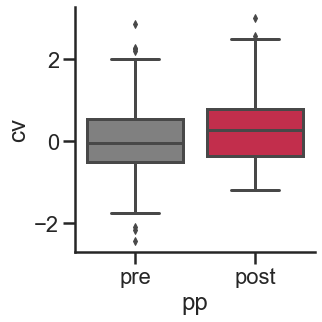

(0.32222222222222235, 0.004823210702792313)


C:\Users\tangy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tangy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

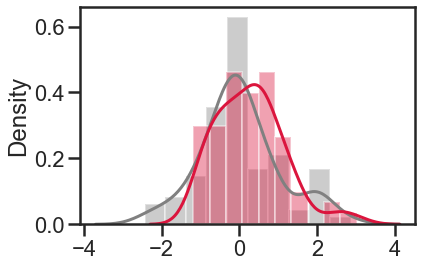

In [191]:
# astropy.stats.circstats.vonmisesmle((post[:,(frex>4)&(frex<=8),500:1200]).flatten())
tf=ALparam[0]
sf=ALparam[1]
pre=np.vstack([(i) 
                   for i in plvdf[(plvdf.pre_post=='pre')
                                    &(plvdf.tf==tf)
                                  &(plvdf.sf==sf)
                                  &(~plvdf.et.str.contains('|'.join(training_stim['LM'])))
#                                  &(plvdf)
                                 ].phsdiff.values])
post=np.vstack([(i) 
                   for i in plvdf[(plvdf.pre_post=='post')
                                    &(plvdf.tf==tf)
                                  &(plvdf.sf==sf)
                                  &(~plvdf.et.str.contains('|'.join(training_stim['LM'])))
#                                  &(plvdf)
                                 ].phsdiff.values])
# for i in range(post.shape[0]):
#     plt.plot(pg.circ_mean(post[i,(frex>=4)&(frex<=4.5),:],axis=0))
#     plt.yticks(np.arange(-np.pi,np.pi+np.pi/4,np.pi/4))
#     plt.show()
postcv=astropy.stats.circstats.circmean((post[:,(frex>4)&(frex<=8),500:1200]).reshape(post.shape[0],-1),axis=1)
precv=astropy.stats.circstats.circmean((pre[:,(frex>4)&(frex<=8),500:1200]).reshape(pre.shape[0],-1),axis=1)
pres=pd.Series(precv).to_frame('cv')
pres['pp']='pre'
posts=pd.Series(postcv).to_frame('cv')
posts['pp']='post'
sns.catplot(data=pd.concat([pres,posts]),x='pp',y='cv',kind='box')
plt.show()
print(astropy.stats.kuiper_two(postcv,precv))
sns.distplot(precv,bins=10)
sns.distplot(postcv,bins=10)

In [331]:
ls=[]
for n,g in plvdf[(~plvdf.et.str.contains('|'.join(training_stim['LM'])))].groupby(['pre_post','et','lpair','sf','tf']):
#     print(n)
#     g['plv']=g.plv.transform(lambda x:np.mean(np.mean(x[:,(frex>=4)&(frex<8),1000:1500],axis=-1),axis=-1))
#     g['plv']=g.plv.transform(lambda x:np.median(x[:,(frex>=4)&(frex<8),:],axis=-2))
    g['plv']=g.plv.transform(lambda x:np.median(x[:,:,500:1200],axis=-1))
    ls.append(g)
test=pd.concat(ls)
test.head()

,et,pre_post,sf,tf,recpair,lpair,plv,phsdiff
4,ET#057_left,post,0.015,0.75,"(V1, AL)","(l23, l23)","[[0.4160032740062515, 0.4545408137258431, 0.49...","[[[-0.17105016815153093, -0.170846534040665, -..."
13,ET#057_left,post,0.015,1.50,"(V1, AL)","(l23, l23)","[[0.6131398211603618, 0.6591165231791186, 0.65...","[[[0.12428290806726712, 0.12578128861488033, 0..."
22,ET#057_left,post,0.015,3.00,"(V1, AL)","(l23, l23)","[[0.47009227994221703, 0.5382342641980725, 0.5...","[[[0.35318541814266, 0.35249380937523145, 0.35..."
31,ET#057_left,post,0.015,6.00,"(V1, AL)","(l23, l23)","[[0.5869868896587578, 0.5875366370534101, 0.56...","[[[0.2417461614854042, 0.23650928468425725, 0...."
40,ET#057_left,post,0.015,12.00,"(V1, AL)","(l23, l23)","[[0.24040635712560526, 0.22640207281897087, 0....","[[[0.42505452640164154, 0.4266450508443204, 0...."


In [336]:
test1=test[~test.et.str.contains('|'.join(['00','00'
                                        ]))]
                                              
ls=[]
for i in range(test1.shape[0]):
    df=test1.iloc[i]
    plv=df.plv.flatten()
    idx=np.repeat(np.arange(df.plv.shape[0]),df.plv.shape[1])
    idx=np.array([df.et+i for i in idx.astype(str)])
    tmpdf=pd.DataFrame({'et':df.et,
                        'pre_post':df.pre_post,
                        'sf':df.sf,
                        'tf':df.tf,
                        'frex':np.tile(frex,df.plv.shape[0]),
#                         'time':np.tile(time,df.plv.shape[0]),
#                         'recpair':df.recpair,
                        'lpair':str(df.lpair),
                        'plv':plv,
                        'idx':idx
                       })
    ls.append(tmpdf)
test1=pd.concat(ls)
test1.head()

,et,pre_post,sf,tf,frex,lpair,plv,idx
0,ET#057_left,post,0.015,0.75,2.000000,"('l23', 'l23')",0.416003,ET#057_left0
1,ET#057_left,post,0.015,0.75,2.205058,"('l23', 'l23')",0.454541,ET#057_left0
2,ET#057_left,post,0.015,0.75,2.431141,"('l23', 'l23')",0.494489,ET#057_left0
3,ET#057_left,post,0.015,0.75,2.680404,"('l23', 'l23')",0.594309,ET#057_left0
4,ET#057_left,post,0.015,0.75,2.955223,"('l23', 'l23')",0.699429,ET#057_left0


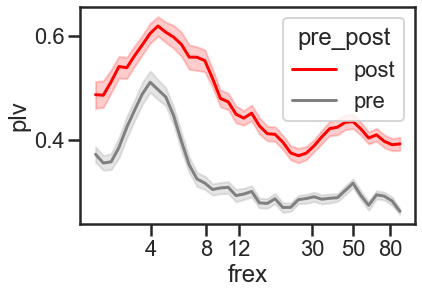

In [339]:
tf=ALparam[0]
sf=ALparam[1]
sns.lineplot(data=test1[(test1.tf==tf)&(test1.sf==sf)&(test1.frex>0.5)].reset_index()
             ,x='frex',y='plv',hue='pre_post',
            ci=68,palette={'pre':'gray','post':'red'}
#              units='idx'
            )
plt.xticks(np.arange(0,40,4))
plt.xscale("log")
plt.minorticks_off()
# plt.xticks(np.arange(0,33,4)[1:],np.arange(0,33,4)[1:])
plt.xticks([4,8,12,30,50,80],[4,8,12,30,50,80]) 
# plt.xticklabels(np.arange(0,33,4)[1:])
# plt.savefig(report_directory+'plv/ALtraining_v1l23all23phaselocking500-1200.png')
# plt.savefig(report_directory+'plv/ALtraining_v1l23all23phaselocking500-1200.pdf')

In [340]:
theta=test1[test1.frex.between(4,8)].groupby(['idx','et','pre_post','sf','tf']).median()
# theta=theta.groupby(level=0).apply(lambda x:x/x.max()).reset_index()
theta['band']='4-8'

alpha=test1[test1.frex.between(8,12)].groupby(['idx','et','pre_post','sf','tf']).median()
# alpha=alpha.groupby(level=0).apply(lambda x:x/x.max()).reset_index()
alpha['band']='8-12'

beta=test1[test1.frex.between(12,30)].groupby(['idx','et','pre_post','sf','tf']).median()
# beta=beta.groupby(level=0).apply(lambda x:x/x.max()).reset_index()
beta['band']='12-30'

lowgamma=test1[test1.frex.between(30,50)].groupby(['idx','et','pre_post','sf','tf']).median()
# beta=beta.groupby(level=0).apply(lambda x:x/x.max()).reset_index()
lowgamma['band']='30-50'

highgamma=test1[test1.frex.between(50,80)].groupby(['idx','et','pre_post','sf','tf']).median()
# beta=beta.groupby(level=0).apply(lambda x:x/x.max()).reset_index()
highgamma['band']='50-80'

bandplv=pd.concat([theta,alpha,beta,lowgamma,highgamma]).reset_index()
bandplv.head()

,idx,et,pre_post,sf,tf,frex,plv,band
0,ET#019_left0,ET#019_left,pre,0.015,0.75,5.852221,0.299516,4-8
1,ET#019_left0,ET#019_left,pre,0.015,1.50,5.852221,0.373709,4-8
2,ET#019_left0,ET#019_left,pre,0.015,3.00,5.852221,0.261565,4-8
3,ET#019_left0,ET#019_left,pre,0.015,6.00,5.852221,0.275177,4-8
4,ET#019_left0,ET#019_left,pre,0.015,12.00,5.852221,0.231230,4-8


In [348]:
ls=[]
tf=ALparam[0]
sf=ALparam[1]
for n,g in bandplv.groupby('band'):
    print(n)
    stat=pg.mwu(g[(g.pre_post=='pre')&(g.tf==tf)&(g.sf==sf)].plv.values
           ,g[(g.pre_post=='post')&(g.tf==tf)&(g.sf==sf)].plv.values)
    stat['band']=n
    stat['prenrec']=g[(g.pre_post=='pre')].idx.nunique()
    stat['postnrec']=g[(g.pre_post=='post')].idx.nunique()
    stat['prenmice']=g[(g.pre_post=='pre')].et.nunique()
    stat['postnmice']=g[(g.pre_post=='post')].et.nunique()
    ls.append(stat)
statdf=pd.concat(ls)
statdf['pcorr']=pg.multicomp(statdf['p-val'].values,method='fdr_bh')[-1]
# statdf.to_csv(report_directory+'plv/ALtraining_v1l23all23phaselocking500-1200_stats.csv')
statdf

12-30
30-50
4-8
50-80
8-12


,U-val,alternative,p-val,RBC,CLES,band,prenrec,postnrec,prenmice,postnmice,pcorr
MWU,1228.0,two-sided,2.903918e-11,0.611269,0.194365,12-30,78,81,9,9,3.629897e-11
MWU,1224.0,two-sided,2.644055e-11,0.612536,0.193732,30-50,78,81,9,9,3.629897e-11
MWU,1428.0,two-sided,2.487412e-09,0.547958,0.226021,4-8,78,81,9,9,2.487412e-09
MWU,1140.0,two-sided,3.536675e-12,0.639126,0.180437,50-80,78,81,9,9,8.841686e-12
MWU,986.0,two-sided,7.146455e-14,0.687876,0.156062,8-12,78,81,9,9,3.573227e-13


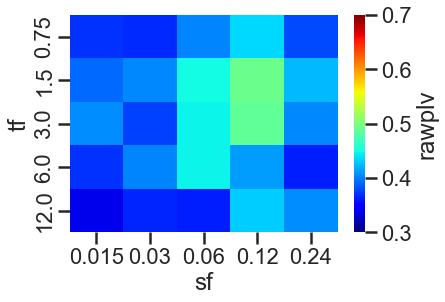

In [351]:
# theta1=theta.drop(columns=['band']).groupby(level=0).apply(lambda x:x/x.max()).reset_index()
theta1=theta.drop(columns=['band']).groupby(level=0).apply(lambda x:x/1).reset_index()
hm=theta1[theta1.pre_post=='pre'].groupby(['sf','tf']).mean().reset_index().pivot('tf','sf','plv')
sns.heatmap(hm,cmap='jet'
#             ,vmin=hm.min().min()*0.9,vmax=hm.max().max()*1.1
            ,vmin=0.3,vmax=0.7
           ,cbar_kws={'label': 'rawplv'}
           )
# plt.savefig(report_directory+'plv/ALtraining_v1l23all23phaselocking500-1200sftfpre.png')
# plt.savefig(report_directory+'plv/ALtraining_v1l23all23phaselocking500-1200sftfpre.pdf')


In [346]:
# pg.anova(data=theta.reset_index(),dv='plv',between=['sf','tf','pre_post'])
ls=[]
for n,g in theta.reset_index().groupby(['sf','tf']):
#     print(n)
    stat=pg.mwu(g[g.pre_post=='post'].plv, g[g.pre_post=='pre'].plv)
    stat['sf']=n[0]
    stat['tf']=n[1]
    stat['prenpair']=g[g.pre_post=='pre'].idx.nunique()
    stat['postnpair']=g[g.pre_post=='post'].idx.nunique()
    stat['prenmice']=g[g.pre_post=='pre'].et.nunique()
    stat['postnmice']=g[g.pre_post=='post'].et.nunique()
    ls.append(stat)
stats=pd.concat(ls)
stats['pcorr']=pg.multicomp(stats['p-val'].values,method='fdr_bh')[-1]
# stats.to_csv(report_directory+'plv/ALtraining_v1l23all23phaselocking500-1200sftf_stats.csv')
stats

,U-val,alternative,p-val,RBC,CLES,sf,tf,prenpair,postnpair,prenmice,postnmice,pcorr
MWU,2823.0,two-sided,9.126022e-04,-0.340456,0.670228,0.015,0.75,78,54,9,6,4.563011e-03
MWU,3055.0,two-sided,1.133853e-05,-0.450617,0.725309,0.015,1.50,78,54,9,6,9.448771e-05
MWU,2125.0,two-sided,9.317658e-01,-0.009022,0.504511,0.015,3.00,78,54,9,6,9.317658e-01
MWU,2599.0,two-sided,2.264133e-02,-0.234093,0.617047,0.015,6.00,78,54,9,6,5.145757e-02
MWU,2884.0,two-sided,3.200628e-04,-0.369421,0.684710,0.015,12.00,78,54,9,6,2.000393e-03
MWU,3194.0,two-sided,4.821932e-07,-0.516619,0.758310,0.030,0.75,78,54,9,6,6.027415e-06
MWU,2563.0,two-sided,3.461663e-02,-0.216999,0.608500,0.030,1.50,78,54,9,6,6.657045e-02
MWU,2784.0,two-sided,1.714638e-03,-0.321937,0.660969,0.030,3.00,78,54,9,6,7.144327e-03
MWU,4890.0,two-sided,2.487412e-09,-0.547958,0.773979,0.030,6.00,78,81,9,9,6.218531e-08
MWU,2659.0,two-sided,1.055396e-02,-0.262583,0.631292,0.030,12.00,78,54,9,6,2.638490e-02


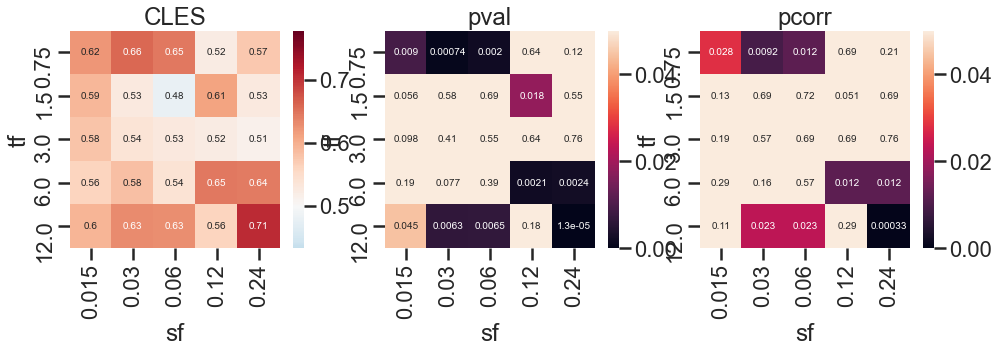

In [476]:
f,ax=plt.subplots(1,3,figsize=(16,4))
# kgroup=[0,3]
hm=stats.pivot('tf','sf','CLES')

# astk=stats[(stats.region==rg)
#          ].pivot('tf','sf','pcorr').values
astk=stats.pivot('tf','sf','pcorr').values
astklabel=np.tile(['n.s.']*5,5).reshape(5,5)
astklabel[(astk<0.05)&(astk>0.01)]='*'
astklabel[(astk<=0.01)&(astk>0.001)]='**'
astklabel[(astk<=0.001)]='***'
# astklabel
sns.heatmap(hm,cmap='RdBu_r'
            ,vmin=hm.min().min()*0.9
            ,vmax=hm.max().max()*1.1
            ,center=0.5,ax=ax[0]
#             ,annot=astklabel,fmt=''
#             ,annot_kws={'fontsize':10}
            ,annot=hm,annot_kws={'fontsize':10}
           )
ax[0].set_title('CLES')
hm=stats.pivot('tf','sf','p-val')
sns.heatmap(hm,vmin=0,vmax=0.05,ax=ax[1],annot=hm,annot_kws={'fontsize':10})
ax[1].set_title('pval')
hm=stats.pivot('tf','sf','pcorr')
sns.heatmap(hm,vmin=0,vmax=0.05,ax=ax[2],annot=hm,annot_kws={'fontsize':10})
ax[2].set_title('pcorr')
# plt.savefig(report_directory+'plv/ALtraining_v1l23lml23phaselocking500-1200sftf_stats_supp.png')
# plt.savefig(report_directory+'plv/ALtraining_v1l23lml23phaselocking500-1200sftf_stats_supp.pdf')